# Import necessary files

In [54]:
# Analysis
import numpy as np
from numpy import loadtxt
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import seaborn as sns

# Hypothesis Testing
from scipy.stats import randint, ttest_ind, chi2_contingency
from scipy import stats

#Warnings
import warnings
warnings.filterwarnings("ignore")

# Load Datasets

In [47]:
# Import Dataset
df_tranID = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/Transaction_ID.csv")
df_taxi = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/Taxi_Data.csv")
df_custID = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/Customer_ID.csv")
df_city = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/City.csv")


# Merge Datasets

In [12]:
# Merge Dataset
# Merge taxi data with transaction data on "Transaction ID"
df0 = pd.merge(df_taxi, df_tranID, on="Transaction ID", how="inner")

# Merge the result with customer data on "Customer ID"
df = pd.merge(df0, df_custID, on="Customer ID", how="inner")

# After combine, drop "Transaction ID" and "Customer ID" columns
df.drop(columns=["Transaction ID", "Customer ID"], inplace=True)
df

,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813
1,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237
2,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Cash,Male,53,11242
3,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Cash,Male,23,23327
4,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...
359387,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash,Male,24,15651
359388,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash,Male,32,6528
359389,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,Male,56,7966
359390,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card,Male,32,6423


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date of Travel          359392 non-null  int64  
 1   Company                 359392 non-null  object 
 2   City                    359392 non-null  object 
 3   Distance Travelled(KM)  359392 non-null  float64
 4   Price Charged           359392 non-null  float64
 5   Cost of Trip            359392 non-null  float64
 6   Payment_Mode            359392 non-null  object 
 7   Gender                  359392 non-null  object 
 8   Age                     359392 non-null  int64  
 9   Income (USD/Month)      359392 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 27.4+ MB


In [16]:
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"], unit="D", origin="1899-12-30")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date of Travel          359392 non-null  datetime64[ns]
 1   Company                 359392 non-null  object        
 2   City                    359392 non-null  object        
 3   Distance Travelled(KM)  359392 non-null  float64       
 4   Price Charged           359392 non-null  float64       
 5   Cost of Trip            359392 non-null  float64       
 6   Payment_Mode            359392 non-null  object        
 7   Gender                  359392 non-null  object        
 8   Age                     359392 non-null  int64         
 9   Income (USD/Month)      359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 27.4+ MB


In [18]:
df

,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813
1,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237
2,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Cash,Male,53,11242
3,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Cash,Male,23,23327
4,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...
359387,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash,Male,24,15651
359388,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash,Male,32,6528
359389,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,Male,56,7966
359390,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card,Male,32,6423


In [20]:
df.duplicated().sum()

0

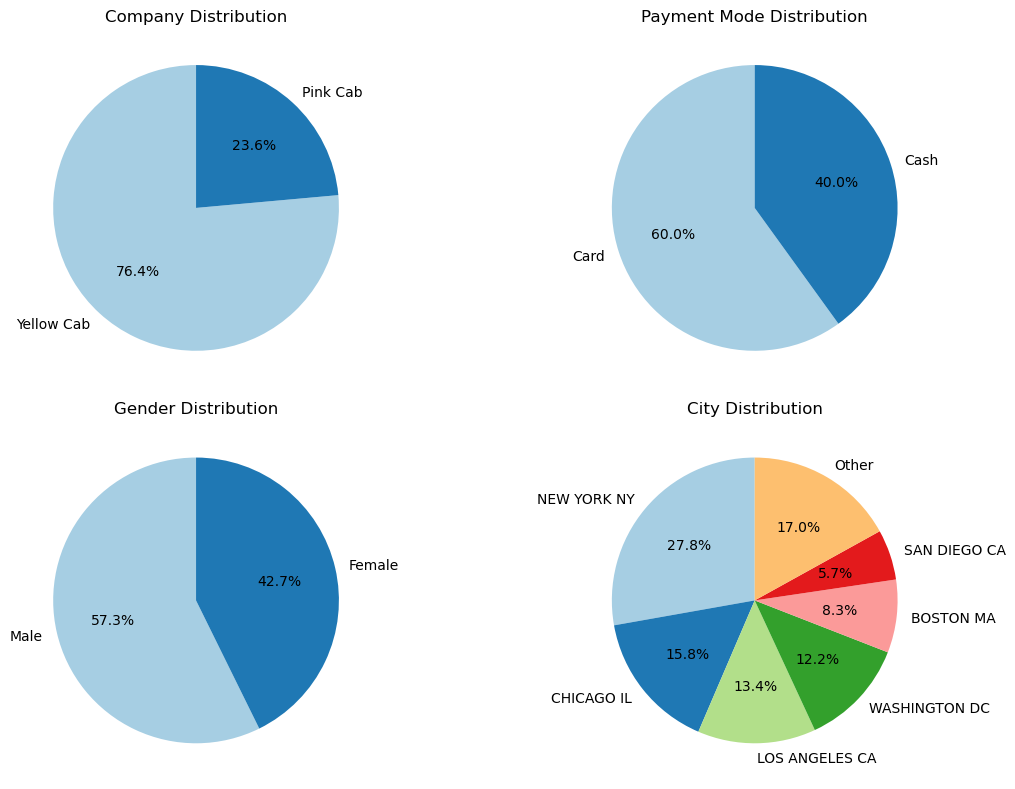

In [22]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
colors = plt.get_cmap("Paired").colors

# Pie chart for 'Company' value counts
company_counts = df["Company"].value_counts()
axs[0, 0].pie(company_counts, labels=company_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[0, 0].set_title("Company Distribution")

# Pie chart for 'Payment_Mode' value counts
payment_counts = df["Payment_Mode"].value_counts()
axs[0, 1].pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[0, 1].set_title("Payment Mode Distribution")

# Pie chart for 'Gender' value counts
gender_counts = df["Gender"].value_counts()
axs[1, 0].pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[1, 0].set_title("Gender Distribution")

# Pie chart for 'City' value counts (Top N cities)
top_cities = 6
city_counts = df["City"].value_counts().nlargest(top_cities)
city_counts["Other"] = df["City"].value_counts()[top_cities:].sum()
axs[1, 1].pie(city_counts, labels=city_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[1, 1].set_title("City Distribution")

# Adjust layout
plt.tight_layout()
plt.show()

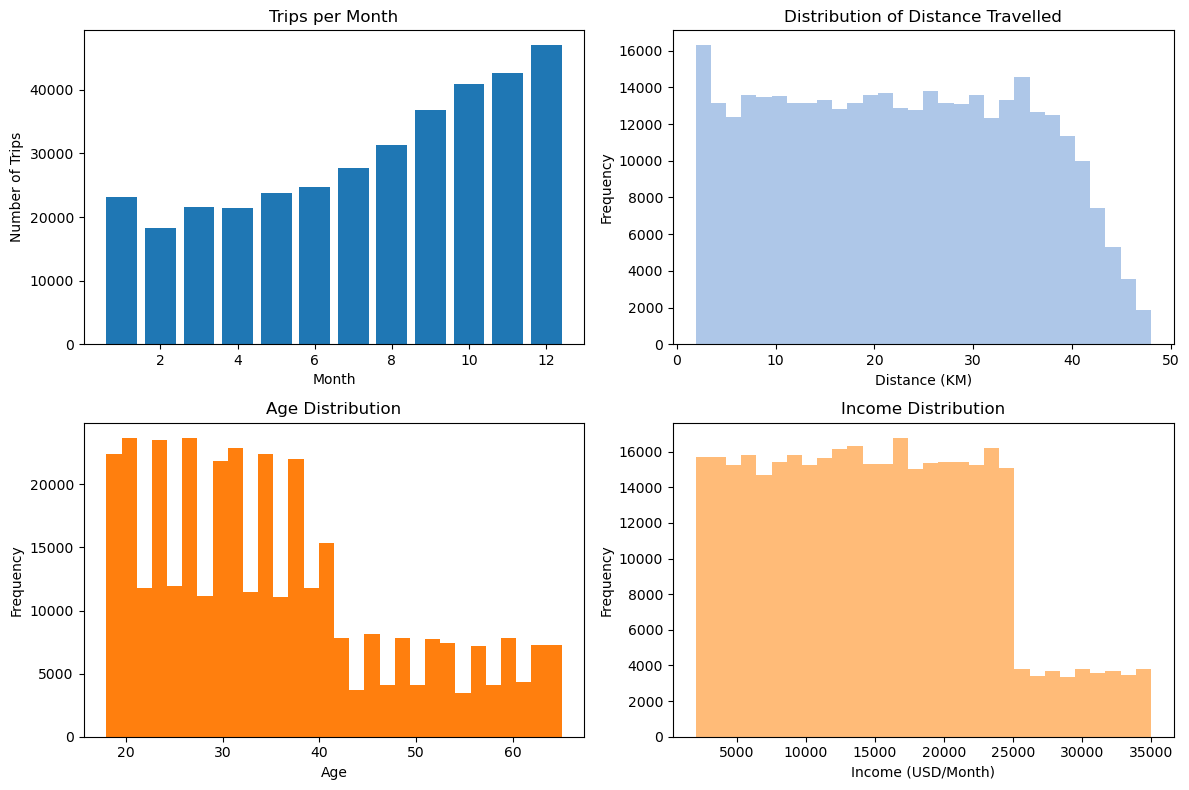

In [24]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
color_scheme = plt.get_cmap("tab20").colors

# Plot for "Date of Travel" by month
df_month = df.copy()
df_month["Month"] = pd.to_datetime(df["Date of Travel"]).dt.month
month_counts = df_month["Month"].value_counts().sort_index()
axs[0, 0].bar(month_counts.index, month_counts.values, color=to_hex(color_scheme[0]))
axs[0, 0].set_title("Trips per Month")
axs[0, 0].set_xlabel("Month")
axs[0, 0].set_ylabel("Number of Trips")

# Histogram for "Distance Travelled(KM)"
axs[0, 1].hist(df["Distance Travelled(KM)"], bins=30, color=to_hex(color_scheme[1]))
axs[0, 1].set_title("Distribution of Distance Travelled")
axs[0, 1].set_xlabel("Distance (KM)")
axs[0, 1].set_ylabel("Frequency")

# Histogram for "Age"
axs[1, 0].hist(df["Age"], bins=30, color=to_hex(color_scheme[2]))
axs[1, 0].set_title("Age Distribution")
axs[1, 0].set_xlabel("Age")
axs[1, 0].set_ylabel("Frequency")

# Histogram for "Income (USD/Month)"
axs[1, 1].hist(df["Income (USD/Month)"], bins=30, color=to_hex(color_scheme[3]))
axs[1, 1].set_title("Income Distribution")
axs[1, 1].set_xlabel("Income (USD/Month)")
axs[1, 1].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [26]:
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]
df["Profit"]

0         57.3150
1         23.6660
2         27.5680
3         25.7980
4         16.8440
           ...   
359387     5.8800
359388     6.9020
359389    87.4200
359390    32.1420
359391    13.9608
Name: Profit, Length: 359392, dtype: float64

In [28]:
df

,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813,57.3150
1,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237,23.6660
2,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Cash,Male,53,11242,27.5680
3,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Cash,Male,23,23327,25.7980
4,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,Card,Male,33,8536,16.8440
...,...,...,...,...,...,...,...,...,...,...,...
359387,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash,Male,24,15651,5.8800
359388,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash,Male,32,6528,6.9020
359389,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,Male,56,7966,87.4200
359390,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card,Male,32,6423,32.1420


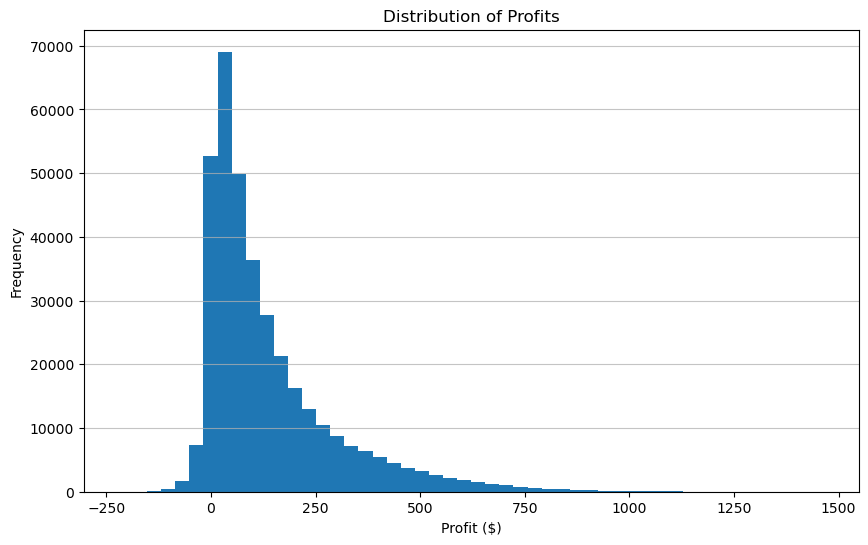

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df["Profit"], bins=50)
plt.title("Distribution of Profits")
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show()

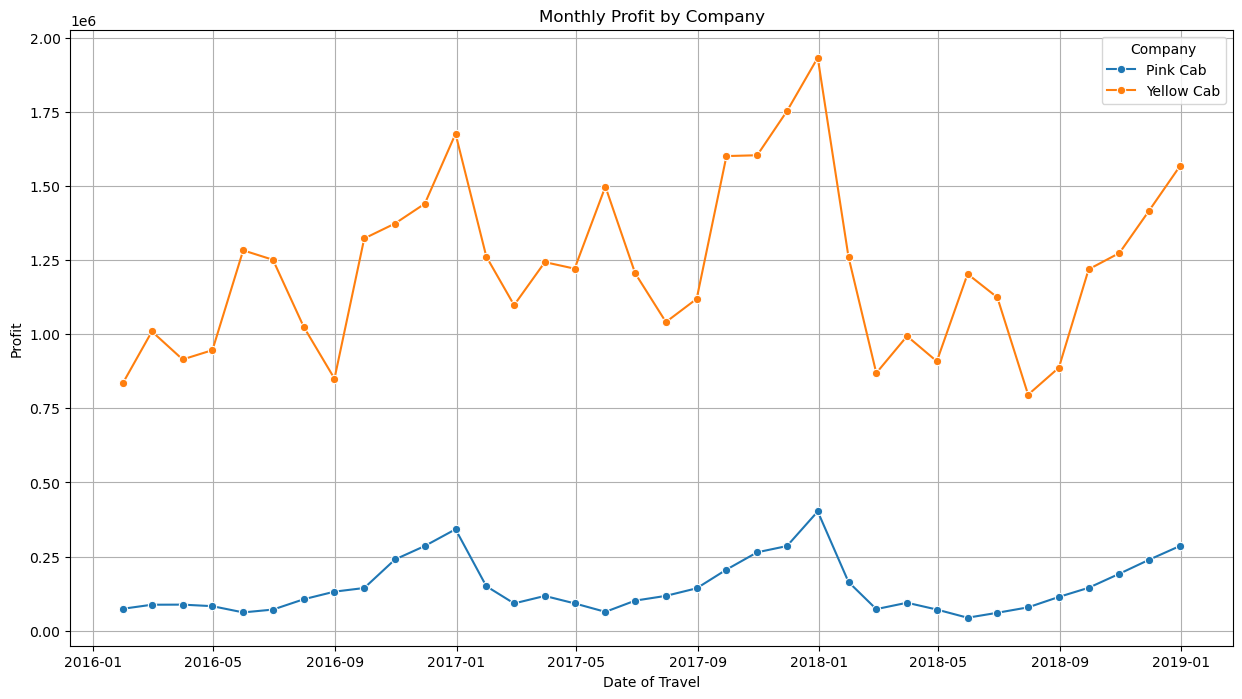

In [32]:
df_month_profit = df.copy()
df_month_profit.set_index("Date of Travel", inplace=True)
monthly_profit = df_month_profit.groupby("Company").resample("ME")["Profit"].sum()
monthly_profit = monthly_profit.reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x="Date of Travel", y="Profit", hue="Company", data=monthly_profit, marker="o")

plt.title("Monthly Profit by Company")
plt.xlabel("Date of Travel")
plt.ylabel("Profit")
plt.legend(title="Company")
plt.grid(True)
plt.show()

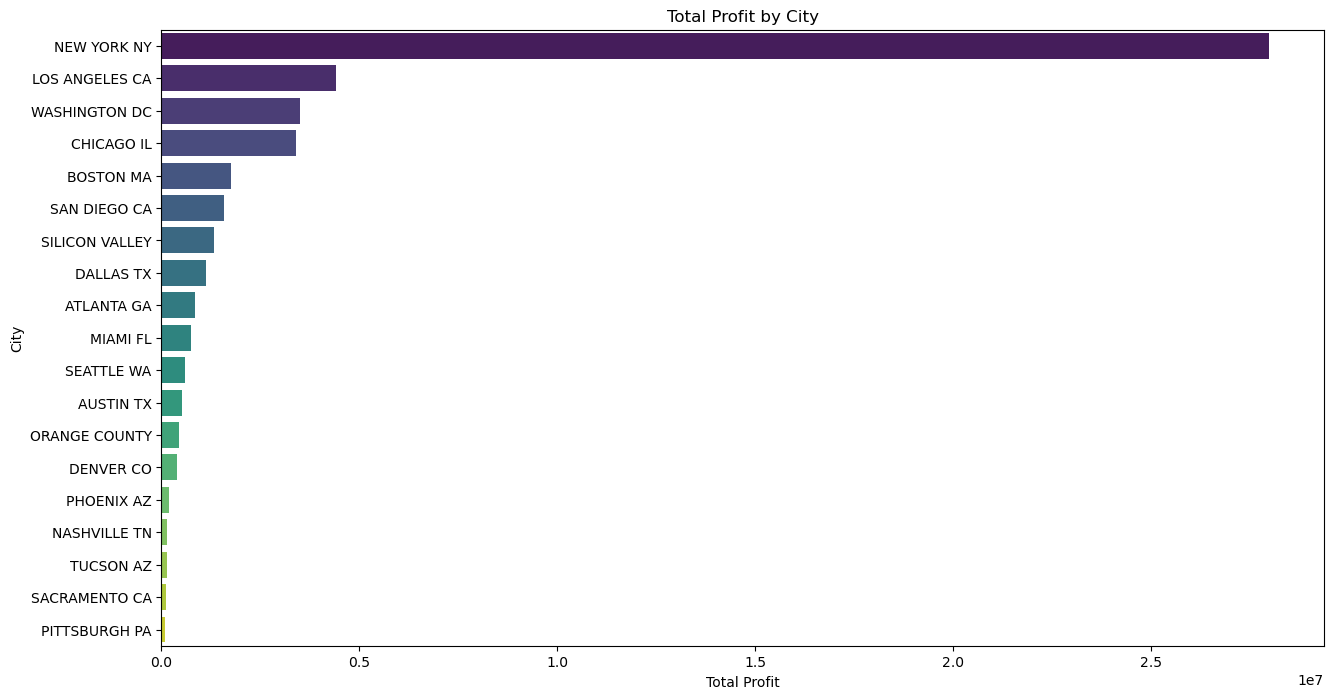

In [55]:
profit_by_city = df.groupby("City")["Profit"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x="Profit", y="City", data=profit_by_city, palette="viridis")
plt.title("Total Profit by City")
plt.xlabel("Total Profit")
plt.ylabel("City")
plt.show();

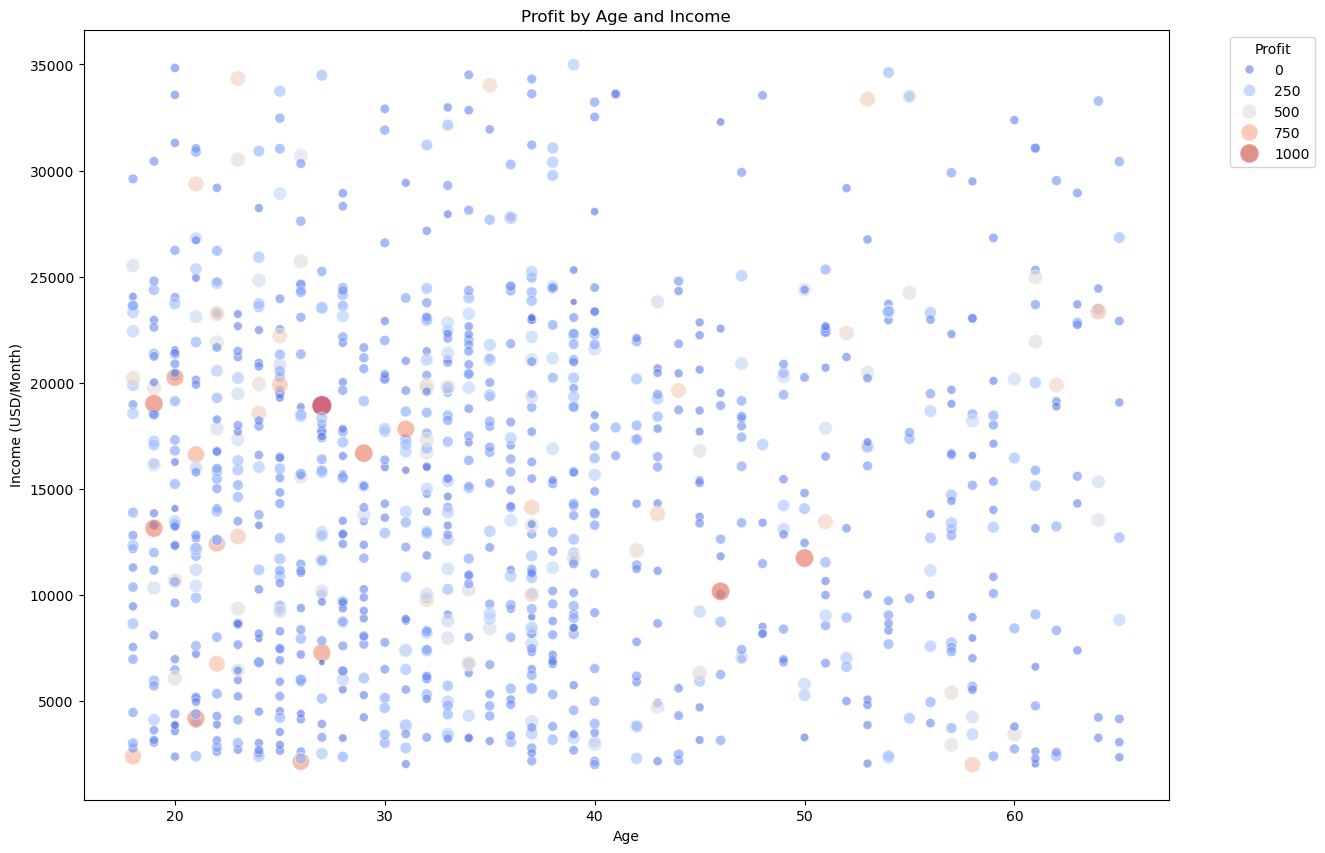

In [36]:
# Sample the data to make the plot more readable
df_sampled = df.sample(n=1000, random_state=1)

# Plot
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=df_sampled, x="Age", y="Income (USD/Month)", size="Profit",
                          hue="Profit", palette="coolwarm", sizes=(20, 200), alpha=0.6)

plt.title("Profit by Age and Income")
plt.xlabel("Age")
plt.ylabel("Income (USD/Month)")
plt.legend(title="Profit", bbox_to_anchor=(1.05, 1), loc='upper left')

handles, labels = scatter.get_legend_handles_labels()
plt.show()

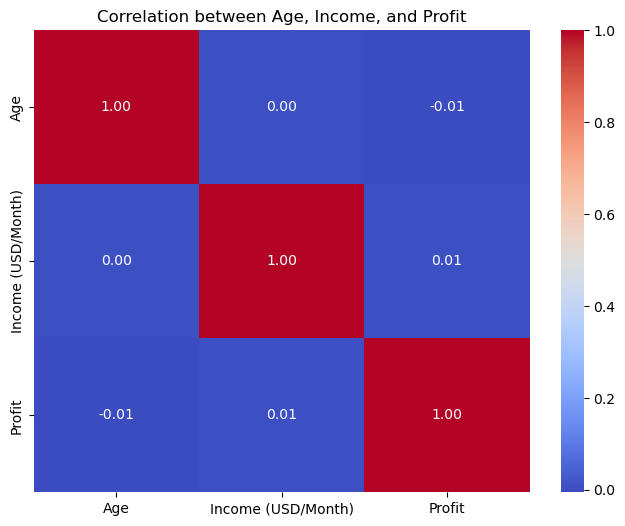

Correlation of Profit with Age: -0.005092963667619376
Correlation of Profit with Income: 0.006148297768292395


In [38]:
# Ensure Age, Income, and Profit columns exist
if 'Age' in df.columns and 'Income (USD/Month)' in df.columns and 'Profit' in df.columns:
    # Compute correlation matrix
    correlation_matrix = df[['Age', 'Income (USD/Month)', 'Profit']].corr()

    # Display correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation between Age, Income, and Profit")
    plt.show()

    # Print correlation values
    print("Correlation of Profit with Age:", correlation_matrix.loc["Profit", "Age"])
    print("Correlation of Profit with Income:", correlation_matrix.loc["Profit", "Income (USD/Month)"])
else:
    print("Required columns ('Age', 'Income (USD/Month)', 'Profit') not found in the dataset.")


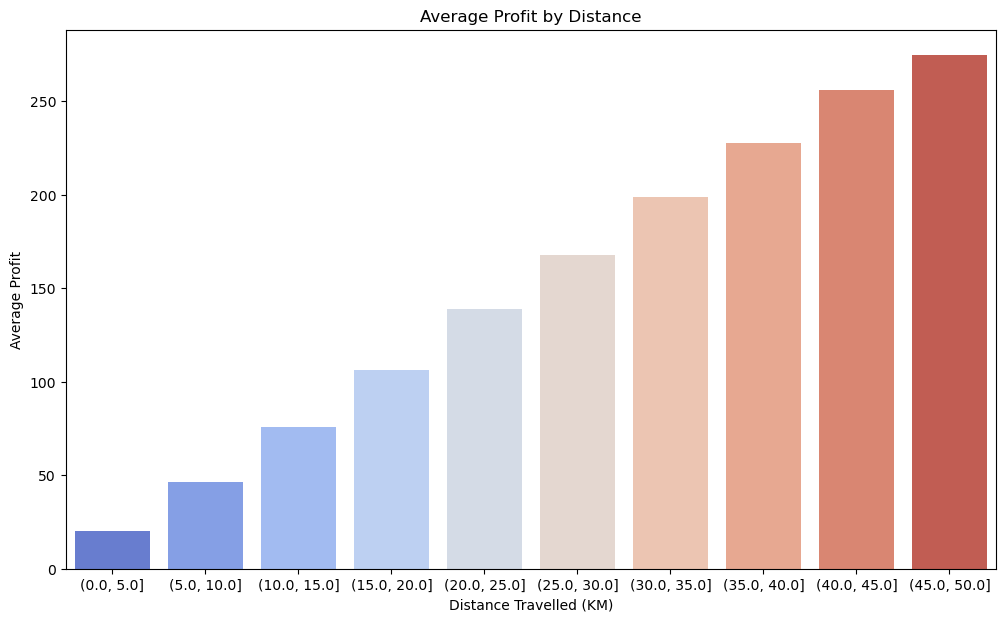

In [56]:
distance_bins = np.arange(0, df["Distance Travelled(KM)"].max() + 5, 5)
df_bins = df.copy()
df_bins["Distance Bin"] = pd.cut(df["Distance Travelled(KM)"], bins=distance_bins)

# Calculate average profit for each distance bin
avg_profit_by_distance = df_bins.groupby("Distance Bin")["Profit"].mean().reset_index()

# Convert distance bin to string for plotting
avg_profit_by_distance["Distance Bin"] = avg_profit_by_distance["Distance Bin"].astype(str)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_profit_by_distance, x="Distance Bin", y="Profit", palette="coolwarm")
plt.title("Average Profit by Distance")
plt.xlabel("Distance Travelled (KM)")
plt.ylabel("Average Profit")
plt.show();

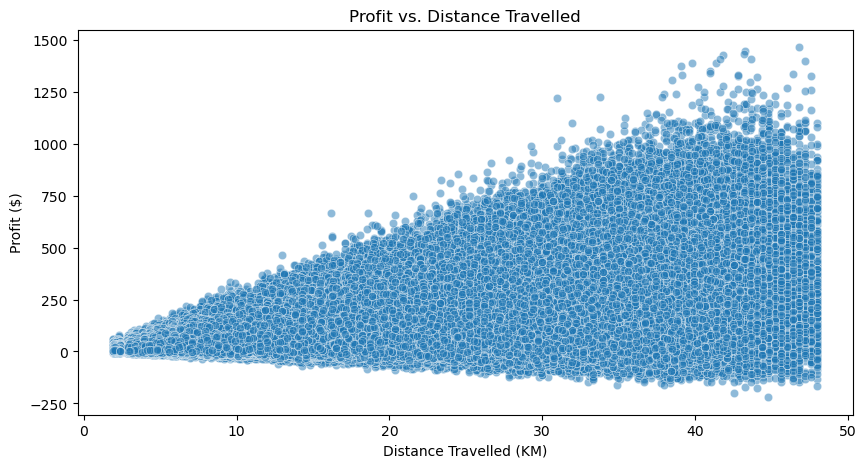

Correlation between Distance and Profit: 0.46276819789711243


In [42]:
# Scatter plot of Profit vs. Distance
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Distance Travelled(KM)", y="Profit", alpha=0.5)
plt.xlabel("Distance Travelled (KM)")
plt.ylabel("Profit ($)")
plt.title("Profit vs. Distance Travelled")
plt.show()

# Correlation between Distance and Profit
correlation_distance_profit = df["Distance Travelled(KM)"].corr(df["Profit"])
print(f"Correlation between Distance and Profit: {correlation_distance_profit}")


C:\Users\DELL\AppData\Local\Temp\ipykernel_19500\2753052699.py:13: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="City", y="Market Penetration", data=df_city_sorted, palette=custom_colors)


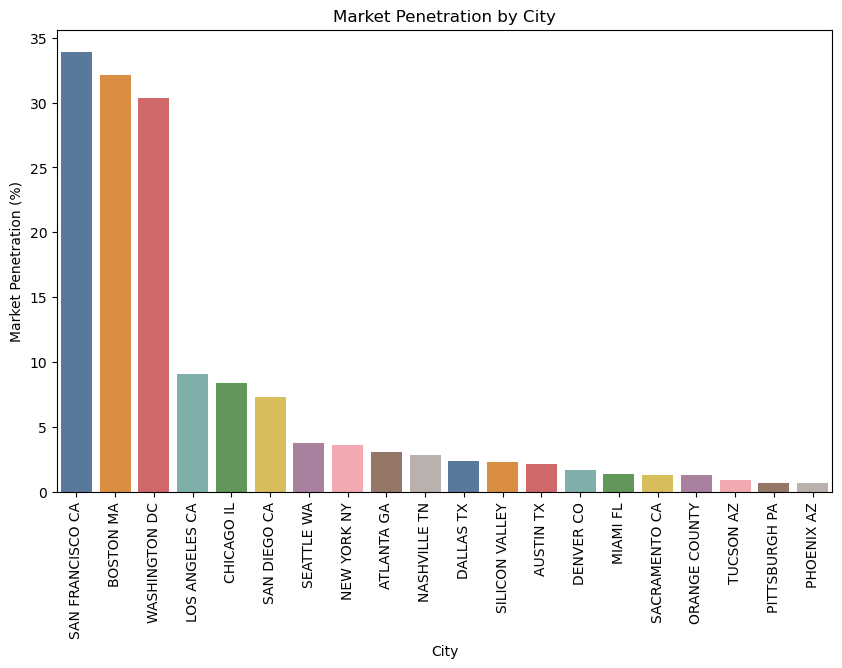

In [49]:
df_city["Population"] = df_city["Population"].str.replace(",", "").astype(int)
df_city["Users"] = df_city["Users"].str.replace(",", "").astype(int)

# Calculate market penetration as the percentage of users in the population
df_city["Market Penetration"] = (df_city["Users"] / df_city["Population"]) * 100

# Sort by market penetration
df_city_sorted = df_city.sort_values("Market Penetration", ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
custom_colors = ["#4e79a7", "#f28e2b", "#e15759", "#76b7b2", "#59a14f", "#edc948", "#b07aa1", "#ff9da7", "#9c755f", "#bab0ac"]
sns.barplot(x="City", y="Market Penetration", data=df_city_sorted, palette=custom_colors)
plt.xticks(rotation=90)
plt.title("Market Penetration by City")
plt.xlabel("City")
plt.ylabel("Market Penetration (%)")
plt.show();

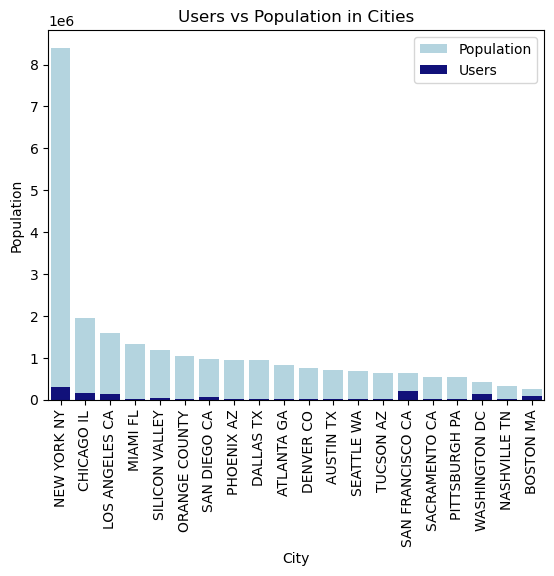

In [46]:
sns.barplot(x="City", y="Population", data=df_city, color="lightblue", label="Population")
sns.barplot(x="City", y="Users", data=df_city, color="darkblue", label="Users")

plt.xticks(rotation=90)
plt.title("Users vs Population in Cities")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="City", y="Income (USD/Month)", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Income Distribution by City")
plt.xlabel("City")
plt.ylabel("Income")
plt.show();

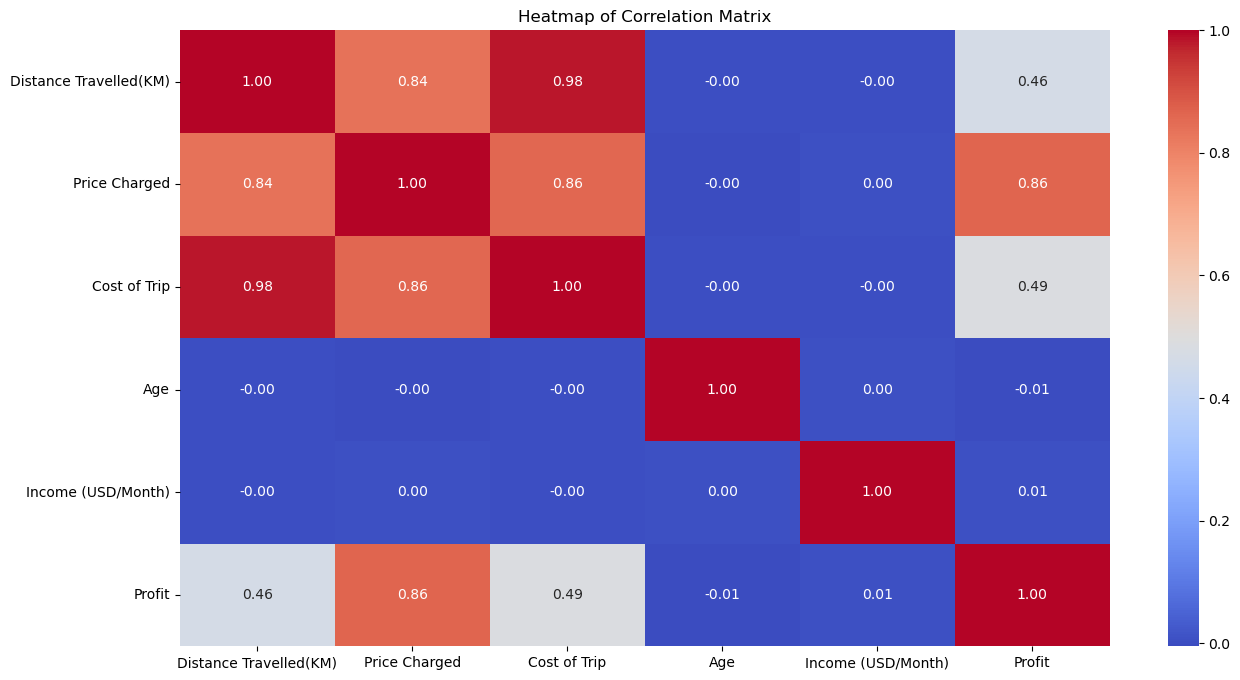

In [50]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Create heatmap to show all variable relationship and leave the company
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(numeric_df.corr(), annot=True,fmt=".2f", cmap="coolwarm", cbar=True)
heatmap.set_title("Heatmap of Correlation Matrix");

In [52]:
# Isolate the "Profit" column for both company.
Pink_Cab = df[df["Company"] == "Pink Cab"]["Profit"]
Yellow_Cab = df[df["Company"] == "Yellow Cab"]["Profit"]

# Find P Value
stats.ttest_ind(a=Pink_Cab, b=Yellow_Cab, equal_var=False)

TtestResult(statistic=-230.99551452746311, pvalue=0.0, df=313532.12464142457)

<b>Market Penetration Hypothesis:</b> Does the company with the highest number of users in cities with the largest populations generate more profit? This aims to analyze the correlation between the market penetration (in terms of users) of the cab companies and their profitability in densely populated cities.

<b>Hypothesis:</b>

<b>Null Hypothesis (H0):</b> There is NO significant difference in the profits generated by cab companies in cities with the largest populations, regardless of the number of users.

<b>Alternative Hypothesis (H1):</b> The company with the highest number of users in cities with the largest populations generates significantly more profit than the company with fewer users.

Significance Level - 5%

Find P-Value

In [62]:
# Merge dataset
df_hypo2 = pd.merge(df, df_city, on="City")

# Identify the largest cities by population
largest_cities = df_city.nlargest(5, "Population")["City"]

# Isolate the data for the largest cities
largest_city_data = df_hypo2[df_hypo2["City"].isin(largest_cities)]

# Isolate profit data for the two companies
profit_pink_cab = largest_city_data[largest_city_data["Company"] == "Pink Cab"]["Profit"]
profit_yellow_cab = largest_city_data[largest_city_data["Company"] == "Yellow Cab"]["Profit"]

# Perform the t-test
stats.ttest_ind(a=profit_pink_cab, b=profit_yellow_cab, equal_var=False)

TtestResult(statistic=-218.89741242558824, pvalue=0.0, df=187858.54728451738)

In [64]:
df

,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813,57.3150
1,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237,23.6660
2,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Cash,Male,53,11242,27.5680
3,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Cash,Male,23,23327,25.7980
4,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,Card,Male,33,8536,16.8440
...,...,...,...,...,...,...,...,...,...,...,...
359387,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash,Male,24,15651,5.8800
359388,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash,Male,32,6528,6.9020
359389,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,Male,56,7966,87.4200
359390,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card,Male,32,6423,32.1420


In [66]:
df["Month"] = df["Date of Travel"].dt.month

# Count occurrences for each month (1 to 12)
month_counts = df["Month"].value_counts().sort_index()

# Print results in a readable format
for month, count in month_counts.items():
    print(f"Month {month}: {count} trips")

Month 1: 23174 trips
Month 2: 18307 trips
Month 3: 21646 trips
Month 4: 21434 trips
Month 5: 23701 trips
Month 6: 24713 trips
Month 7: 27676 trips
Month 8: 31323 trips
Month 9: 36859 trips
Month 10: 40852 trips
Month 11: 42700 trips
Month 12: 47007 trips


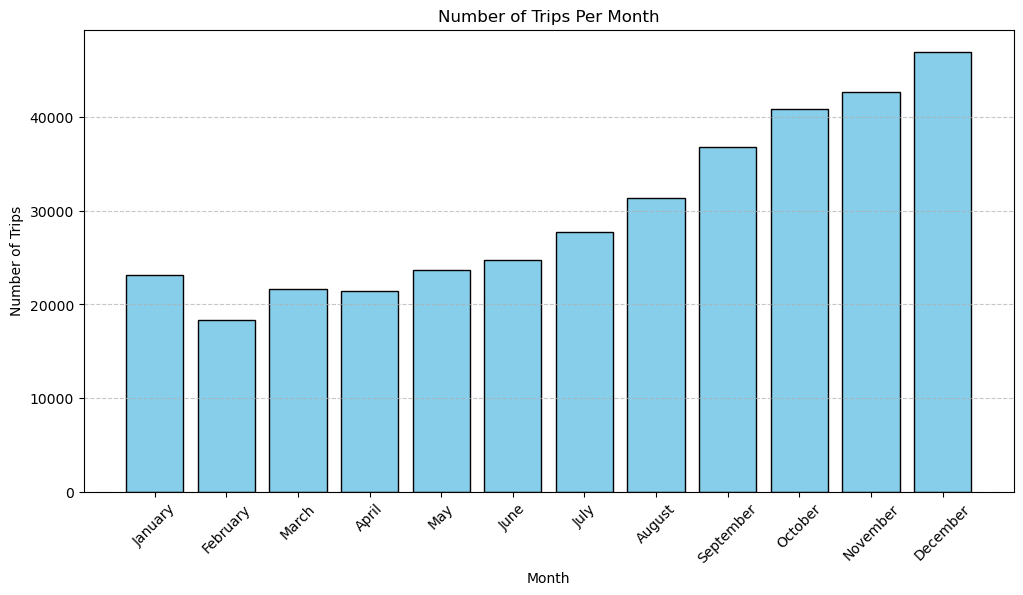

In [68]:
df["Month"] = df["Date of Travel"].dt.month_name()
month_counts = df["Month"].value_counts().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(month_counts.index, month_counts.values, color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Number of Trips Per Month")
plt.xticks(rotation=45)  # Rotate month names for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [70]:
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"])

# Extract the year from the date column
df["Year"] = df["Date of Travel"].dt.year

# Count the number of trips per year
yearly_counts = df["Year"].value_counts().sort_index()

# Print yearly trip counts
print(yearly_counts)

Year
2016    107319
2017    128510
2018    123563
Name: count, dtype: int64


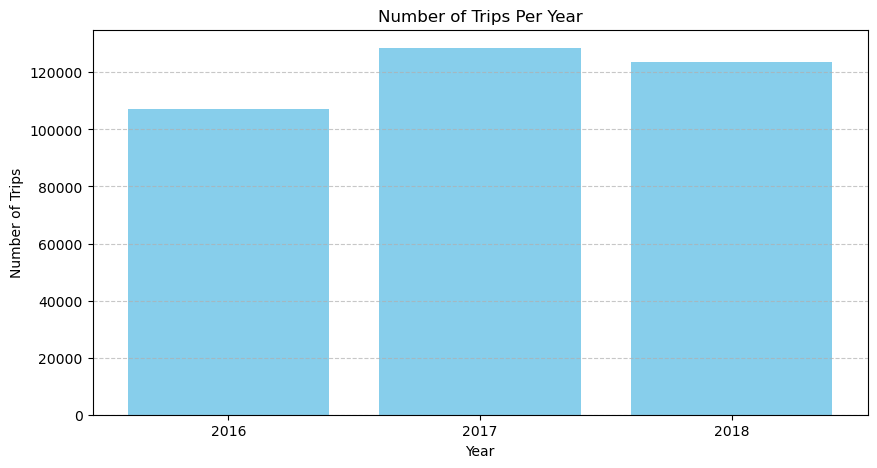

In [72]:
plt.figure(figsize=(10, 5))
plt.bar(yearly_counts.index, yearly_counts.values, color="skyblue")
plt.xlabel("Year")
plt.ylabel("Number of Trips")
plt.title("Number of Trips Per Year")
plt.xticks(yearly_counts.index)  # Ensure all years are displayed
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [74]:
df

,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Month,Year
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813,57.3150,January,2016
1,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237,23.6660,January,2016
2,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Cash,Male,53,11242,27.5680,January,2016
3,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Cash,Male,23,23327,25.7980,January,2016
4,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,Card,Male,33,8536,16.8440,January,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash,Male,24,15651,5.8800,January,2018
359388,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash,Male,32,6528,6.9020,January,2018
359389,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,Male,56,7966,87.4200,January,2018
359390,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card,Male,32,6423,32.1420,January,2018


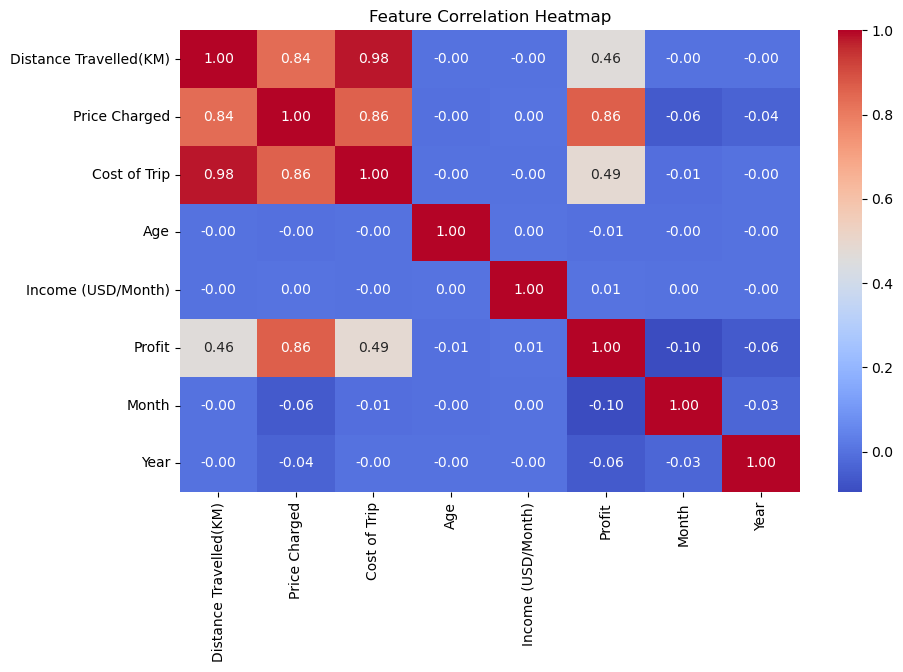

Correlation of features with Profit
Profit                    1.000000
Price Charged             0.864154
Cost of Trip              0.486056
Distance Travelled(KM)    0.462768
Income (USD/Month)        0.006148
Age                      -0.005093
Year                     -0.060567
Month                    -0.096352
Name: Profit, dtype: float64


In [78]:
# Load dataset
file_path = "C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Convert 'Date of Travel' to datetime if not already
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"], errors='coerce')

# Extract Month and Year for time-series analysis
df["Month"] = df["Date of Travel"].dt.month
df["Year"] = df["Date of Travel"].dt.year

# Drop non-numeric columns before correlation analysis
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Print correlation with Profit (or another target variable you want to predict)
target_variable = "Profit"  # Change to "Price Charged", "Distance Travelled(KM)", etc., as needed
print("Correlation of features with", target_variable)
print(correlation_matrix[target_variable].sort_values(ascending=False))


In [82]:
df.describe()

,Date of Travel,Distance Travelled(KM),Price Charged,Cost of Trip,Age,Income (USD/Month),Profit,Month,Year
count,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,2017-08-17 01:37:55.042293760,22.567254,423.443311,286.190113,35.336705,15048.822937,137.253198,7.500434,2017.045199
min,2016-01-02 00:00:00,1.900000,15.600000,19.000000,18.000000,2000.000000,-220.060000,1.000000,2016.000000
25%,2016-11-23 00:00:00,12.000000,206.437500,151.200000,25.000000,8424.000000,28.012000,5.000000,2016.000000
50%,2017-09-10 00:00:00,22.440000,386.360000,282.480000,33.000000,14685.000000,81.962000,8.000000,2017.000000
75%,2018-05-12 00:00:00,32.960000,583.660000,413.683200,42.000000,21035.000000,190.030000,10.000000,2018.000000
max,2018-12-31 00:00:00,48.000000,2048.030000,691.200000,65.000000,35000.000000,1463.966000,12.000000,2018.000000
std,NaN,12.233526,274.378911,157.993661,12.594234,7969.409482,160.311840,3.445095,0.800239


In [84]:
df.head()

,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Month,Year
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,Male,28,10813,57.315,1,2016
1,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,Male,27,9237,23.666,1,2016
2,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash,Male,53,11242,27.568,1,2016
3,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Cash,Male,23,23327,25.798,1,2016
4,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Card,Male,33,8536,16.844,1,2016


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


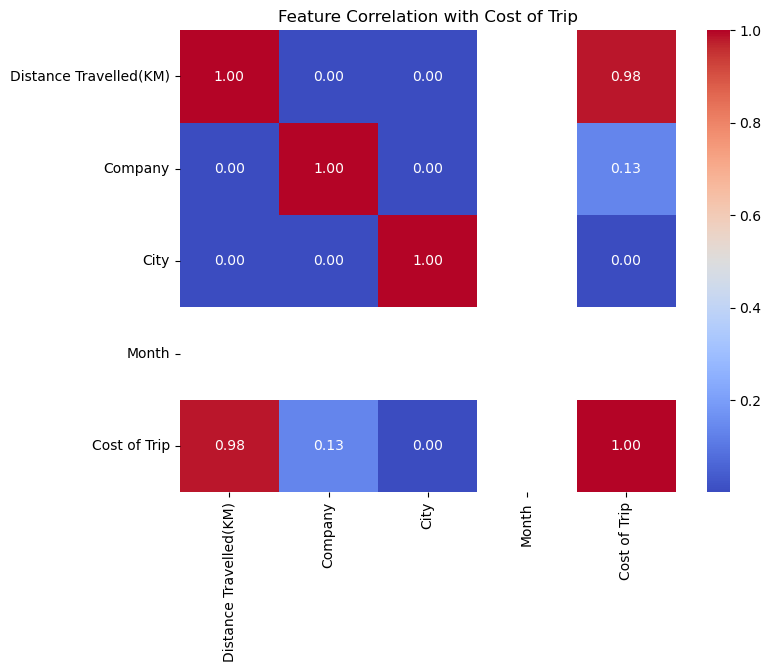

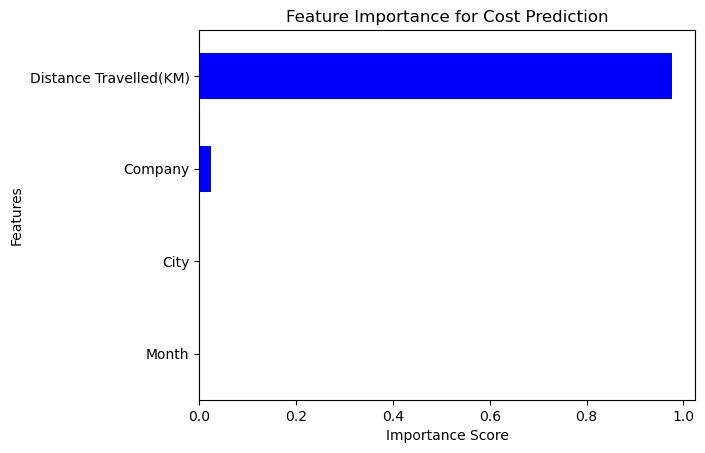

In [88]:
# Ensure Date is Parsed Correctly
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"])

# Convert Month Names to Numbers (e.g., January → 1, February → 2, ...)
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}
df["Month"] = df["Month"].map(month_mapping)

# Selecting Relevant Columns
selected_features = ["Distance Travelled(KM)", "Company", "City", "Month", "Cost of Trip"]
df_selected = df[selected_features].copy()

# Encode Categorical Variables (Company & City)
label_enc = LabelEncoder()
df_selected["Company"] = label_enc.fit_transform(df_selected["Company"])  # 0 or 1 for Yellow/Pink
df_selected["City"] = label_enc.fit_transform(df_selected["City"])  # Convert City to Numeric

# Check Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Cost of Trip")
plt.show()

# Train a Random Forest Regressor to Get Feature Importance
X = df_selected.drop(columns=["Cost of Trip"])
y = df_selected["Cost of Trip"]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature Importance Plot
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', color='blue')
plt.title("Feature Importance for Cost Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [94]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
# Step 1: Load the dataset (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')  # Replace with your file path

# Step 2: Preprocess the data
# Convert 'Date of Travel' to datetime and extract features
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month
data['Travel_Day'] = data['Date of Travel'].dt.day

# Drop the original 'Date of Travel' column
data = data.drop(columns=['Date of Travel'])

# Encode categorical columns
label_encoders = {}
for column in ['Company', 'City', 'Payment_Mode', 'Gender', 'Month']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 3: Train the Random Forest model
X = data.drop(columns=['Profit'])
y = data['Profit']  # Target is company profit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance on Historical Data:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 4: Generate synthetic data for April and May 2025
# Use the last month (December 2018) as a baseline and adjust for trends
last_month_data = data[(data['Travel_Year'] == 2018) & (data['Travel_Month'] == 12)].copy()

# Function to create future data for a given month
def generate_future_data(base_data, year, month, num_trips):
    future_data = base_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)  # Random days
    # Simulate slight growth in Price Charged and Cost of Trip (e.g., 2% increase per year)
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02 * years_diff)
    future_data['Cost of Trip'] *= (1 + 0.02 * years_diff)
    return future_data

# Estimate number of trips per month (average from historical data)
avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)

# Generate data for April and May 2025
april_2025_data = generate_future_data(last_month_data, 2025, 4, avg_trips_per_month)
may_2025_data = generate_future_data(last_month_data, 2025, 5, avg_trips_per_month)

# Step 5: Predict profits for April and May 2025
april_X = april_2025_data.drop(columns=['Profit'])
may_X = may_2025_data.drop(columns=['Profit'])

april_pred_profits = rf_model.predict(april_X)
may_pred_profits = rf_model.predict(may_X)

# Step 6: Aggregate total profits for each month
total_april_profit = april_pred_profits.sum()
total_may_profit = may_pred_profits.sum()

print("\nPredicted Total Company Profits:")
print(f"April 2025: ${total_april_profit:,.2f}")
print(f"May 2025: ${total_may_profit:,.2f}")

# Step 7: Breakdown by company (Pink Cab and Yellow Cab)
# Re-encode Company back to original names for reporting
april_2025_data['Predicted_Profit'] = april_pred_profits
may_2025_data['Predicted_Profit'] = may_pred_profits

# Reverse encoding for Company
company_encoder = label_encoders['Company']
april_2025_data['Company'] = company_encoder.inverse_transform(april_2025_data['Company'])
may_2025_data['Company'] = company_encoder.inverse_transform(may_2025_data['Company'])

# Group by Company
april_profit_by_company = april_2025_data.groupby('Company')['Predicted_Profit'].sum()
may_profit_by_company = may_2025_data.groupby('Company')['Predicted_Profit'].sum()

print("\nProfit Breakdown by Company:")
print("April 2025:")
print(april_profit_by_company)
print("May 2025:")
print(may_profit_by_company)

Model Performance on Historical Data:
Mean Squared Error: 1.06
R² Score: 1.00

Predicted Total Company Profits:
April 2025: $1,380,507.40
May 2025: $1,380,506.62

Profit Breakdown by Company:
April 2025:
Company
Pink Cab      2.108503e+05
Yellow Cab    1.169657e+06
Name: Predicted_Profit, dtype: float64
May 2025:
Company
Pink Cab      2.108521e+05
Yellow Cab    1.169655e+06
Name: Predicted_Profit, dtype: float64


In [104]:
# Step 1: Load the dataset (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')  # Replace with your file path

# Step 2: Preprocess the data
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month
data['Travel_Day'] = data['Date of Travel'].dt.day
data = data.drop(columns=['Date of Travel'])

# Encode categorical columns
label_encoders = {}
for column in ['Company', 'City', 'Payment_Mode', 'Gender', 'Month']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 3: Train the Random Forest model (avoiding data leakage)
X = data.drop(columns=['Profit', 'Price Charged', 'Cost of Trip'])
y = data['Profit']  # Target is company profit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance on Historical Data (No Leakage):")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 4: Function to generate synthetic data for user-specified month and year
def generate_future_data(base_data, year, month, num_trips):
    # Use historical data for the same month (if available) or closest month
    historical_month_data = base_data[base_data['Travel_Month'] == month].copy()
    if historical_month_data.empty:  # Fallback to overall data if no month-specific data
        historical_month_data = base_data.copy()

    future_data = historical_month_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)  # Random days
    # Adjust for time difference with 2% annual increase
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02 * years_diff)
    future_data['Cost of Trip'] *= (1 + 0.02 * years_diff)
    return future_data.drop(columns=['Profit', 'Price Charged', 'Cost of Trip'])

# Step 5: User input for month and year
avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)

Model Performance on Historical Data (No Leakage):
Mean Squared Error: 4251.57
R² Score: 0.84


In [106]:
# User input for month and year
while True:
    try:
        user_year = int(input("Enter the year for profit prediction (e.g., 2025): "))
        user_month = int(input("Enter the month for profit prediction (1-12): "))
        if 1 <= user_month <= 12 and user_year >= 2019:
            break
        else:
            print("Invalid input. Month must be 1-12, and year must be 2019 or later.")
    except ValueError:
        print("Please enter valid numeric values.")

# Generate data and predict profits
future_data = generate_future_data(data, user_year, user_month, avg_trips_per_month)
future_pred_profits = rf_model.predict(future_data)

# Total predicted profit
total_future_profit = future_pred_profits.sum()
print(f"\nPredicted Total Company Profit for {user_month}/{user_year}: ${total_future_profit:,.2f}")

# Breakdown by company
future_data['Predicted_Profit'] = future_pred_profits
company_encoder = label_encoders['Company']
future_data['Company'] = company_encoder.inverse_transform(future_data['Company'])

# Calculate profits for each company
profit_by_company = future_data.groupby('Company')['Predicted_Profit'].sum()

# Display individual profits in readable format
pink_cab_profit = profit_by_company.get('Pink Cab', 0)  # Default to 0 if not present
yellow_cab_profit = profit_by_company.get('Yellow Cab', 0)

print(f"\nProfit Breakdown by Company for {user_month}/{user_year}:")
print(f"Pink Cab: ${pink_cab_profit:,.2f}")
print(f"Yellow Cab: ${yellow_cab_profit:,.2f}")
print(f"Total (Pink Cab + Yellow Cab): ${(pink_cab_profit + yellow_cab_profit):,.2f}")

Enter the year for profit prediction (e.g., 2025):  2025
Enter the month for profit prediction (1-12):  5



Predicted Total Company Profit for 5/2025: $1,672,393.30

Profit Breakdown by Company for 5/2025:
Pink Cab: $69,073.93
Yellow Cab: $1,603,319.37
Total (Pink Cab + Yellow Cab): $1,672,393.30


In [108]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
# Step 1: Load the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')  # Replace with your file path

# Step 2: Preprocess the data
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month
data['Travel_Day'] = data['Date of Travel'].dt.day
data = data.drop(columns=['Date of Travel'])

# Encode categorical columns
label_encoders = {}
categorical_cols = ['Company', 'City', 'Payment_Mode', 'Gender', 'Month']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Prepare features (X) and target (y)
exclude_cols = ['Profit', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)', 'Age']
X = data.drop(columns=exclude_cols)
y = data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for Ridge and Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
# Step 3: Ridge Regression
print("\n=== Ridge Regression ===")

# Define Ridge model and hyperparameter grid
ridge = Ridge(random_state=42)
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Perform GridSearchCV
ridge_grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=ridge_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

ridge_grid_search.fit(X_train_scaled, y_train)
ridge_best_params = ridge_grid_search.best_params_
print("\nBest Hyperparameters for Ridge:")
print(ridge_best_params)
print(f"Best MSE (negative): {ridge_grid_search.best_score_:.2f}")

# Train Ridge model with best parameters
ridge_model = Ridge(**ridge_best_params, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Evaluate on test set
ridge_y_pred = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)

# Calculate tolerance-based accuracy
tolerance = 50  # Consider predictions within $50 of the true profit as "accurate"
ridge_absolute_errors = np.abs(ridge_y_pred - y_test)
ridge_accuracy_within_tolerance = np.mean(ridge_absolute_errors <= tolerance) * 100

print("\nRidge Regression Performance on Test Data:")
print(f"Mean Squared Error: {ridge_mse:.2f}")
print(f"R² Score: {ridge_r2:.2f}")
print(f"Root Mean Squared Error (per trip): ${ridge_rmse:.2f}")
print(f"Accuracy (within ±$50 tolerance): {ridge_accuracy_within_tolerance:.2f}%")

# Feature coefficients (importance)
ridge_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("\nRidge Regression Feature Coefficients:")
print(ridge_coefficients)

# Step 4: Predict future profits with Ridge
def generate_future_data(base_data, year, month, num_trips, scaler):
    historical_month_data = base_data[base_data['Travel_Month'] == month].copy()
    if historical_month_data.empty:
        historical_month_data = base_data.copy()

    future_data = historical_month_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02) ** years_diff  # 2% inflation
    future_data['Cost of Trip'] *= (1 + 0.02) ** years_diff   # 2% inflation
    future_X = future_data.drop(columns=['Profit', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)', 'Age'])
    return future_X, future_data, scaler.transform(future_X)

avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)
print(f"\nAverage Trips per Month: {avg_trips_per_month}")

while True:
    try:
        user_year = int(input("Enter the year for profit prediction (e.g., 2025): "))
        user_month = int(input("Enter the month for profit prediction (1-12): "))
        if 1 <= user_month <= 12 and user_year >= 2019:
            break
        else:
            print("Invalid input. Month must be 1-12, and year must be 2019 or later.")
    except ValueError:
        print("Please enter valid numeric values.")

# Generate future data and predict profits
future_X, future_data, future_X_scaled = generate_future_data(data, user_year, user_month, avg_trips_per_month, scaler)
ridge_future_pred_profits = ridge_model.predict(future_X_scaled)

# Total profit with confidence interval
ridge_total_future_profit = ridge_future_pred_profits.sum()
ridge_total_error = ridge_rmse * avg_trips_per_month
print(f"\nRidge Predicted Total Company Profit for {user_month}/{user_year}: ${ridge_total_future_profit:,.2f}")
print(f"Estimated Range: ${ridge_total_future_profit - ridge_total_error:,.2f}–${ridge_total_future_profit + ridge_total_error:,.2f}")
print(f"(Note: Range based on RMSE ±${ridge_rmse:.2f} per trip across {avg_trips_per_month} trips)")

# Breakdown by company
future_data['Predicted_Profit'] = ridge_future_pred_profits
future_data['Company'] = label_encoders['Company'].inverse_transform(future_data['Company'])
ridge_profit_by_company = future_data.groupby('Company')['Predicted_Profit'].sum()
ridge_pink_cab_profit = ridge_profit_by_company.get('Pink Cab', 0)
ridge_yellow_cab_profit = ridge_profit_by_company.get('Yellow Cab', 0)
ridge_pink_error = ridge_total_error * (ridge_pink_cab_profit / ridge_total_future_profit) if ridge_total_future_profit != 0 else 0
ridge_yellow_error = ridge_total_error * (ridge_yellow_cab_profit / ridge_total_future_profit) if ridge_total_future_profit != 0 else 0

print(f"\nRidge Profit Breakdown by Company for {user_month}/{user_year}:")
print(f"Pink Cab: ${ridge_pink_cab_profit:,.2f} (Range: ${ridge_pink_cab_profit - ridge_pink_error:,.2f}–${ridge_pink_cab_profit + ridge_pink_error:,.2f})")
print(f"Yellow Cab: ${ridge_yellow_cab_profit:,.2f} (Range: ${ridge_yellow_cab_profit - ridge_yellow_error:,.2f}–${ridge_yellow_cab_profit + ridge_yellow_error:,.2f})")
print(f"Total (Pink Cab + Yellow Cab): ${(ridge_pink_cab_profit + ridge_yellow_cab_profit):,.2f}")


=== Ridge Regression ===
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Hyperparameters for Ridge:
{'alpha': 10.0}
Best MSE (negative): -18072.44

Ridge Regression Performance on Test Data:
Mean Squared Error: 18190.98
R² Score: 0.30
Root Mean Squared Error (per trip): $134.87
Accuracy (within ±$50 tolerance): 37.54%

Ridge Regression Feature Coefficients:
                  Feature  Coefficient
2  Distance Travelled(KM)    73.976684
0                 Company    40.668219
8            Travel_Month   -14.058876
1                    City     9.905493
6                    Year    -4.916546
7             Travel_Year    -4.916546
5                   Month     2.608825
4                  Gender     2.392127
9              Travel_Day    -1.159043
3            Payment_Mode     0.241310

Average Trips per Month: 9983


Enter the year for profit prediction (e.g., 2025):  2060
Enter the month for profit prediction (1-12):  12



Ridge Predicted Total Company Profit for 12/2060: $-1,481,912.65
Estimated Range: $-2,828,359.06–$-135,466.25
(Note: Range based on RMSE ±$134.87 per trip across 9983 trips)

Ridge Profit Breakdown by Company for 12/2060:
Pink Cab: $-539,371.53 (Range: $-1,029,437.43–$-49,305.63)
Yellow Cab: $-942,541.12 (Range: $-1,798,921.63–$-86,160.62)
Total (Pink Cab + Yellow Cab): $-1,481,912.65


In [114]:
# Step 5: Lasso Regression
print("\n=== Lasso Regression ===")

# Define Lasso model and hyperparameter grid
lasso = Lasso(random_state=42, max_iter=10000)
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Perform GridSearchCV
lasso_grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=lasso_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

lasso_grid_search.fit(X_train_scaled, y_train)
lasso_best_params = lasso_grid_search.best_params_
print("\nBest Hyperparameters for Lasso:")
print(lasso_best_params)
print(f"Best MSE (negative): {lasso_grid_search.best_score_:.2f}")

# Train Lasso model with best parameters
lasso_model = Lasso(**lasso_best_params, random_state=42, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)

# Evaluate on test set
lasso_y_pred = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)

# Calculate tolerance-based accuracy
lasso_absolute_errors = np.abs(lasso_y_pred - y_test)
lasso_accuracy_within_tolerance = np.mean(lasso_absolute_errors <= tolerance) * 100

print("\nLasso Regression Performance on Test Data:")
print(f"Mean Squared Error: {lasso_mse:.2f}")
print(f"R² Score: {lasso_r2:.2f}")
print(f"Root Mean Squared Error (per trip): ${lasso_rmse:.2f}")
print(f"Accuracy (within ±$50 tolerance): {lasso_accuracy_within_tolerance:.2f}%")

# Feature coefficients (importance)
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("\nLasso Regression Feature Coefficients:")
print(lasso_coefficients)

# Step 6: Predict future profits with Lasso
future_X, future_data, future_X_scaled = generate_future_data(data, user_year, user_month, avg_trips_per_month, scaler)
lasso_future_pred_profits = lasso_model.predict(future_X_scaled)

# Total profit with confidence interval
lasso_total_future_profit = lasso_future_pred_profits.sum()
lasso_total_error = lasso_rmse * avg_trips_per_month
print(f"\nLasso Predicted Total Company Profit for {user_month}/{user_year}: ${lasso_total_future_profit:,.2f}")
print(f"Estimated Range: ${lasso_total_future_profit - lasso_total_error:,.2f}–${lasso_total_future_profit + lasso_total_error:,.2f}")
print(f"(Note: Range based on RMSE ±${lasso_rmse:.2f} per trip across {avg_trips_per_month} trips)")

# Breakdown by company
future_data['Predicted_Profit'] = lasso_future_pred_profits
future_data['Company'] = label_encoders['Company'].inverse_transform(future_data['Company'])
lasso_profit_by_company = future_data.groupby('Company')['Predicted_Profit'].sum()
lasso_pink_cab_profit = lasso_profit_by_company.get('Pink Cab', 0)
lasso_yellow_cab_profit = lasso_profit_by_company.get('Yellow Cab', 0)
lasso_pink_error = lasso_total_error * (lasso_pink_cab_profit / lasso_total_future_profit) if lasso_total_future_profit != 0 else 0
lasso_yellow_error = lasso_total_error * (lasso_yellow_cab_profit / lasso_total_future_profit) if lasso_total_future_profit != 0 else 0

print(f"\nLasso Profit Breakdown by Company for {user_month}/{user_year}:")
print(f"Pink Cab: ${lasso_pink_cab_profit:,.2f} (Range: ${lasso_pink_cab_profit - lasso_pink_error:,.2f}–${lasso_pink_cab_profit + lasso_pink_error:,.2f})")
print(f"Yellow Cab: ${lasso_yellow_cab_profit:,.2f} (Range: ${lasso_yellow_cab_profit - lasso_yellow_error:,.2f}–${lasso_yellow_cab_profit + lasso_yellow_error:,.2f})")
print(f"Total (Pink Cab + Yellow Cab): ${(lasso_pink_cab_profit + lasso_yellow_cab_profit):,.2f}")


=== Lasso Regression ===
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Hyperparameters for Lasso:
{'alpha': 0.01}
Best MSE (negative): -18072.44

Lasso Regression Performance on Test Data:
Mean Squared Error: 18191.03
R² Score: 0.30
Root Mean Squared Error (per trip): $134.87
Accuracy (within ±$50 tolerance): 37.53%

Lasso Regression Feature Coefficients:
                  Feature   Coefficient
2  Distance Travelled(KM)  7.396927e+01
0                 Company  4.066006e+01
8            Travel_Month -1.404699e+01
1                    City  9.895806e+00
6                    Year -9.822952e+00
5                   Month  2.595749e+00
4                  Gender  2.382457e+00
9              Travel_Day -1.149170e+00
3            Payment_Mode  2.313607e-01
7             Travel_Year -9.328621e-15

Lasso Predicted Total Company Profit for 12/2060: $1,155,264.84
Estimated Range: $-191,183.73–$2,501,713.41
(Note: Range based on RMSE ±$134.87 per trip across 9983 trips)

Lasso P

In [116]:
# Step 7: Compare Ridge and Lasso
print("\n=== Comparison of Ridge and Lasso Regression ===")
comparison = pd.DataFrame({
    'Model': ['Ridge', 'Lasso'],
    'MSE': [ridge_mse, lasso_mse],
    'R² Score': [ridge_r2, lasso_r2],
    'RMSE': [ridge_rmse, lasso_rmse],
    'Accuracy (within ±$50)': [ridge_accuracy_within_tolerance, lasso_accuracy_within_tolerance],
    'Total Profit (Predicted)': [ridge_total_future_profit, lasso_total_future_profit],
    'Profit Range (Lower)': [ridge_total_future_profit - ridge_total_error, lasso_total_future_profit - lasso_total_error],
    'Profit Range (Upper)': [ridge_total_future_profit + ridge_total_error, lasso_total_future_profit + lasso_total_error]
})
print(comparison)


=== Comparison of Ridge and Lasso Regression ===
   Model           MSE  R² Score        RMSE  Accuracy (within ±$50)  \
0  Ridge  18190.976033  0.297028  134.873926               37.538085   
1  Lasso  18191.034386  0.297025  134.874143               37.532520   

   Total Profit (Predicted)  Profit Range (Lower)  Profit Range (Upper)  
0             -1.481913e+06         -2.828359e+06         -1.354662e+05  
1              1.155265e+06         -1.911837e+05          2.501713e+06  


In [120]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.4 MB/s eta 0:00:00


In [122]:
import lightgbm as lgb

In [124]:
# Step 1: Load the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')  # Replace with your file path

# Step 2: Explore the dataset
print("=== Dataset Exploration ===")

# Number of rows and columns
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

# Column names and data types
print("\nColumn names and data types:")
print(data.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(data.describe())

# Unique values in categorical columns
categorical_cols = ['Company', 'City', 'Payment_Mode', 'Gender', 'Month']
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    if col in data.columns:
        print(f"{col}: {data[col].unique()}")

# Sample of the first few rows
print("\nSample of the dataset (first 5 rows):")
print(data.head())

# Step 3: Preprocess the data
# Convert 'Date of Travel' to datetime and extract components
if 'Date of Travel' in data.columns:
    data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
    data['Travel_Year'] = data['Date of Travel'].dt.year
    data['Travel_Month'] = data['Date of Travel'].dt.month
    data['Travel_Day'] = data['Date of Travel'].dt.day
    data = data.drop(columns=['Date of Travel'])
else:
    print("Warning: 'Date of Travel' not found. Ensure 'Travel_Year', 'Travel_Month', 'Travel_Day' are present.")
    required_date_cols = ['Travel_Year', 'Travel_Month', 'Travel_Day']
    if not all(col in data.columns for col in required_date_cols):
        raise KeyError("Dataset must contain either 'Date of Travel' or preprocessed 'Travel_Year', 'Travel_Month', 'Travel_Day' columns")

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    else:
        print(f"Warning: '{col}' not found in dataset, skipping encoding")

# Step 4: Prepare features (X) and target (y) for LightGBM
exclude_cols = ['Profit', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)', 'Age']
X = data.drop(columns=exclude_cols)
y = data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Convert to LightGBM Dataset (before training)
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Step 6: Print prepared data summary
print("\n=== Prepared Data for LightGBM ===")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target variable (y) range: min={y.min():.2f}, max={y.max():.2f}, mean={y.mean():.2f}")
print("\nFeatures prepared for LightGBM (X):")
print(X.columns.tolist())
print("\nSample of prepared features (first 5 rows of X_train):")
print(X_train.head())

=== Dataset Exploration ===
Number of rows: 359392
Number of columns: 13

Column names and data types:
Date of Travel             object
Company                    object
City                       object
Distance Travelled(KM)    float64
Price Charged             float64
Cost of Trip              float64
Payment_Mode               object
Gender                     object
Age                         int64
Income (USD/Month)          int64
Profit                    float64
Month                      object
Year                        int64
dtype: object

Missing values per column:
Date of Travel            0
Company                   0
City                      0
Distance Travelled(KM)    0
Price Charged             0
Cost of Trip              0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Profit                    0
Month                     0
Year                      0
dtype: int64

Basic statistics for numerical colu

In [126]:
# Step 1: Load and preprocess the dataset (using your output as reference)
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')  # Replace with your file path

# Convert 'Date of Travel' to datetime and extract components
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month
data['Travel_Day'] = data['Date of Travel'].dt.day
data = data.drop(columns=['Date of Travel'])

# Encode categorical columns
categorical_cols = ['Company', 'City', 'Payment_Mode', 'Gender', 'Month']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Prepare features (X) and target (y)
exclude_cols = ['Profit', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)', 'Age', 'Year']  # Drop 'Year' to avoid multicollinearity
X = data.drop(columns=exclude_cols)
y = data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Convert to LightGBM Dataset with categorical features
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, categorical_feature=categorical_cols, free_raw_data=False)

# Step 3: Define LightGBM parameters
params = {
    'objective': 'regression',  # Regression task
    'metric': 'mse',           # Mean Squared Error
    'boosting_type': 'gbdt',   # Traditional Gradient Boosting Decision Tree
    'num_leaves': 31,          # Number of leaves in one tree
    'learning_rate': 0.1,      # Step size shrinkage
    'feature_fraction': 0.9,   # Fraction of features to consider per tree
    'bagging_fraction': 0.8,   # Fraction of data to use for bagging
    'bagging_freq': 5,         # Frequency of bagging
    'verbose': -1,             # No verbose output during training
    'n_jobs': -1              # Use all available cores
}

# Step 4: Train the model
num_round = 100  # Number of boosting iterations
print("\nTraining LightGBM Model...")
gbm = lgb.train(params, train_data, num_boost_round=num_round, valid_sets=[test_data], callbacks=[lgb.log_evaluation(period=10)])

# Step 5: Evaluate the model
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate tolerance-based accuracy
tolerance = 50  # Predictions within $50 of true profit
absolute_errors = np.abs(y_pred - y_test)
accuracy_within_tolerance = np.mean(absolute_errors <= tolerance) * 100

print("\nLightGBM Performance on Test Data:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (per trip): ${rmse:.2f}")
print(f"Accuracy (within ±$50 tolerance): {accuracy_within_tolerance:.2f}%")

# Step 6: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbm.feature_importance(importance_type='gain')
}).sort_values(by='Importance', ascending=False)
print("\nLightGBM Feature Importance:")
print(feature_importance)

# Step 7: Function to generate synthetic data with 2% inflation
def generate_future_data(base_data, year, month, num_trips, scaler=None):
    historical_month_data = base_data[base_data['Travel_Month'] == month].copy()
    if historical_month_data.empty:
        historical_month_data = base_data.copy()

    future_data = historical_month_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02) ** years_diff  # 2% inflation
    future_data['Cost of Trip'] *= (1 + 0.02) ** years_diff   # 2% inflation
    future_X = future_data.drop(columns=exclude_cols)
    return future_X, future_data

avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)
print(f"\nAverage Trips per Month: {avg_trips_per_month}")

while True:
    try:
        user_year = int(input("Enter the year for profit prediction (e.g., 2025): "))
        user_month = int(input("Enter the month for profit prediction (1-12): "))
        if 1 <= user_month <= 12 and user_year >= 2019:
            break
        else:
            print("Invalid input. Month must be 1-12, and year must be 2019 or later.")
    except ValueError:
        print("Please enter valid numeric values.")

# Generate future data and predict profits
future_X, future_data = generate_future_data(data, user_year, user_month, avg_trips_per_month)
future_pred_profits = gbm.predict(future_X)

# Total profit with confidence interval
total_future_profit = future_pred_profits.sum()
total_error = rmse * avg_trips_per_month
print(f"\nPredicted Total Company Profit for {user_month}/{user_year}: ${total_future_profit:,.2f}")
print(f"Estimated Range: ${total_future_profit - total_error:,.2f}–${total_future_profit + total_error:,.2f}")
print(f"(Note: Range based on RMSE ±${rmse:.2f} per trip across {avg_trips_per_month} trips)")

# Breakdown by company
future_data['Predicted_Profit'] = future_pred_profits
future_data['Company'] = label_encoders['Company'].inverse_transform(future_data['Company'])
profit_by_company = future_data.groupby('Company')['Predicted_Profit'].sum()
pink_cab_profit = profit_by_company.get('Pink Cab', 0)
yellow_cab_profit = profit_by_company.get('Yellow Cab', 0)
pink_error = total_error * (pink_cab_profit / total_future_profit) if total_future_profit != 0 else 0
yellow_error = total_error * (yellow_cab_profit / total_future_profit) if total_future_profit != 0 else 0

print(f"\nProfit Breakdown by Company for {user_month}/{user_year}:")
print(f"Pink Cab: ${pink_cab_profit:,.2f} (Range: ${pink_cab_profit - pink_error:,.2f}–${pink_cab_profit + pink_error:,.2f})")
print(f"Yellow Cab: ${yellow_cab_profit:,.2f} (Range: ${yellow_cab_profit - yellow_error:,.2f}–${yellow_cab_profit + yellow_error:,.2f})")
print(f"Total (Pink Cab + Yellow Cab): ${(pink_cab_profit + yellow_cab_profit):,.2f}")


Training LightGBM Model...
[10]	valid_0's l2: 9947
[20]	valid_0's l2: 6222.64
[30]	valid_0's l2: 5466.64
[40]	valid_0's l2: 5224.18
[50]	valid_0's l2: 5025.66
[60]	valid_0's l2: 4920.94
[70]	valid_0's l2: 4849.04
[80]	valid_0's l2: 4788.95
[90]	valid_0's l2: 4759.51
[100]	valid_0's l2: 4702.81

LightGBM Performance on Test Data:
Mean Squared Error: 4702.81
R² Score: 0.82
Root Mean Squared Error (per trip): $68.58
Accuracy (within ±$50 tolerance): 67.28%

LightGBM Feature Importance:
                  Feature    Importance
1                    City  1.025571e+10
2  Distance Travelled(KM)  9.639423e+09
0                 Company  2.982890e+09
5                   Month  1.286400e+09
7            Travel_Month  6.944023e+08
6             Travel_Year  3.338823e+08
8              Travel_Day  2.670672e+08
3            Payment_Mode  1.002593e+06
4                  Gender  8.595656e+05

Average Trips per Month: 9983


Enter the year for profit prediction (e.g., 2025):  2056
Enter the month for profit prediction (1-12):  5



Predicted Total Company Profit for 5/2056: $1,584,107.22
Estimated Range: $899,502.39–$2,268,712.04
(Note: Range based on RMSE ±$68.58 per trip across 9983 trips)

Profit Breakdown by Company for 5/2056:
Pink Cab: $81,382.63 (Range: $46,211.44–$116,553.82)
Yellow Cab: $1,502,724.59 (Range: $853,290.95–$2,152,158.22)
Total (Pink Cab + Yellow Cab): $1,584,107.22


In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

# Step 1: Load and preprocess the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')

# Convert 'Date of Travel' to datetime and extract components
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month
data['Travel_Day'] = data['Date of Travel'].dt.day
data = data.drop(columns=['Date of Travel'])

# Encode categorical columns
categorical_cols = ['Company', 'City', 'Payment_Mode', 'Gender', 'Month']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Prepare features (X) and target (y)
exclude_cols = ['Profit', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)', 'Age', 'Year', 'Month']  # Drop 'Year' and 'Month'
X = data.drop(columns=exclude_cols)
y = data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Update categorical columns (exclude 'Month')
categorical_cols = ['Company', 'City', 'Payment_Mode', 'Gender']

# Step 2: Convert to LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, categorical_feature=categorical_cols, free_raw_data=False)

# Step 3: Define LightGBM parameters with early stopping
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 40,          # Increased from 31 to capture more complexity
    'learning_rate': 0.05,     # Reduced from 0.1 for more stable learning
    'feature_fraction': 0.8,   # Reduced to prevent overfitting
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'n_jobs': -1,
    'lambda_l1': 0.1,         # L1 regularization
    'lambda_l2': 0.1          # L2 regularization
}

# Step 4: Train the model with early stopping
num_round = 1000  # Higher max iterations, but early stopping will halt
print("\nTraining LightGBM Model with Early Stopping...")
gbm = lgb.train(
    params,
    train_data,
    num_boost_round=num_round,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=10)]
)

# Step 5: Evaluate the model
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate tolerance-based accuracy
tolerance = 50
absolute_errors = np.abs(y_pred - y_test)
accuracy_within_tolerance = np.mean(absolute_errors <= tolerance) * 100

print("\nOptimized LightGBM Performance on Test Data:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (per trip): ${rmse:.2f}")
print(f"Accuracy (within ±$50 tolerance): {accuracy_within_tolerance:.2f}%")

# Step 6: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbm.feature_importance(importance_type='gain')
}).sort_values(by='Importance', ascending=False)
print("\nLightGBM Feature Importance:")
print(feature_importance)

# Step 7: Function to generate synthetic data with 2% inflation
def generate_future_data(base_data, year, month, num_trips):
    historical_month_data = base_data[base_data['Travel_Month'] == month].copy()
    if historical_month_data.empty:
        historical_month_data = base_data.copy()

    future_data = historical_month_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02) ** years_diff  # 2% inflation
    future_data['Cost of Trip'] *= (1 + 0.02) ** years_diff   # 2% inflation
    future_X = future_data.drop(columns=exclude_cols)
    return future_X, future_data

avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)
print(f"\nAverage Trips per Month: {avg_trips_per_month}")

while True:
    try:
        user_year = int(input("Enter the year for profit prediction (e.g., 2025): "))
        user_month = int(input("Enter the month for profit prediction (1-12): "))
        if 1 <= user_month <= 12 and user_year >= 2019:
            break
        else:
            print("Invalid input. Month must be 1-12, and year must be 2019 or later.")
    except ValueError:
        print("Please enter valid numeric values.")

# Generate future data and predict profits
future_X, future_data = generate_future_data(data, user_year, user_month, avg_trips_per_month)
future_pred_profits = gbm.predict(future_X)

# Total profit with confidence interval
total_future_profit = future_pred_profits.sum()
total_error = rmse * avg_trips_per_month
print(f"\nPredicted Total Company Profit for {user_month}/{user_year}: ${total_future_profit:,.2f}")
print(f"Estimated Range: ${total_future_profit - total_error:,.2f}–${total_future_profit + total_error:,.2f}")
print(f"(Note: Range based on RMSE ±${rmse:.2f} per trip across {avg_trips_per_month} trips)")

# Breakdown by company
future_data['Predicted_Profit'] = future_pred_profits
future_data['Company'] = label_encoders['Company'].inverse_transform(future_data['Company'])
profit_by_company = future_data.groupby('Company')['Predicted_Profit'].sum()
pink_cab_profit = profit_by_company.get('Pink Cab', 0)
yellow_cab_profit = profit_by_company.get('Yellow Cab', 0)
pink_error = total_error * (pink_cab_profit / total_future_profit) if total_future_profit != 0 else 0
yellow_error = total_error * (yellow_cab_profit / total_future_profit) if total_future_profit != 0 else 0

print(f"\nProfit Breakdown by Company for {user_month}/{user_year}:")
print(f"Pink Cab: ${pink_cab_profit:,.2f} (Range: ${pink_cab_profit - pink_error:,.2f}–${pink_cab_profit + pink_error:,.2f})")
print(f"Yellow Cab: ${yellow_cab_profit:,.2f} (Range: ${yellow_cab_profit - yellow_error:,.2f}–${yellow_cab_profit + yellow_error:,.2f})")
print(f"Total (Pink Cab + Yellow Cab): ${(pink_cab_profit + yellow_cab_profit):,.2f}")


Training LightGBM Model with Early Stopping...
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 16209.8
[20]	valid_0's l2: 10958.1
[30]	valid_0's l2: 8269.72
[40]	valid_0's l2: 6978.08
[50]	valid_0's l2: 6169.17
[60]	valid_0's l2: 5682.16
[70]	valid_0's l2: 5427.69
[80]	valid_0's l2: 5263.17
[90]	valid_0's l2: 5153.47
[100]	valid_0's l2: 5078.43
[110]	valid_0's l2: 5007.06
[120]	valid_0's l2: 4945.51
[130]	valid_0's l2: 4907.55
[140]	valid_0's l2: 4872.67
[150]	valid_0's l2: 4834.95
[160]	valid_0's l2: 4792.48
[170]	valid_0's l2: 4771.43
[180]	valid_0's l2: 4752.26
[190]	valid_0's l2: 4722.35
[200]	valid_0's l2: 4710.77
[210]	valid_0's l2: 4684.69
[220]	valid_0's l2: 4671.17
[230]	valid_0's l2: 4649.75
[240]	valid_0's l2: 4634.77
[250]	valid_0's l2: 4622.72
[260]	valid_0's l2: 4606.47
[270]	valid_0's l2: 4598.23
[280]	valid_0's l2: 4588.48
[290]	valid_0's l2: 4575.11
[300]	valid_0's l2: 4558.89
[310]	valid_0's l2: 4550.17
[320]	valid_0's l2: 4540.75
[330

Enter the year for profit prediction (e.g., 2025):  2245
Enter the month for profit prediction (1-12):  5



Predicted Total Company Profit for 5/2245: $1,567,235.97
Estimated Range: $918,868.12–$2,215,603.82
(Note: Range based on RMSE ±$64.95 per trip across 9983 trips)

Profit Breakdown by Company for 5/2245:
Pink Cab: $58,786.85 (Range: $34,466.64–$83,107.06)
Yellow Cab: $1,508,449.12 (Range: $884,401.48–$2,132,496.75)
Total (Pink Cab + Yellow Cab): $1,567,235.97


In [ ]:
# Step 1: Load and preprocess the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')

# Convert 'Date of Travel' to datetime and extract components
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month
data['Travel_Day'] = data['Date of Travel'].dt.day
data = data.drop(columns=['Date of Travel'])

# Encode categorical columns
categorical_cols = ['Company', 'City', 'Payment_Mode', 'Gender', 'Month']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature engineering: Add interaction term
data['Distance_Company'] = data['Distance Travelled(KM)'] * data['Company']

# Prepare features (X) and target (y)
exclude_cols = ['Profit', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)', 'Age', 'Year', 'Month']
X = data.drop(columns=exclude_cols)
y = data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Update categorical columns
categorical_cols = ['Company', 'City', 'Payment_Mode', 'Gender']

# Step 2: Hyperparameter tuning with GridSearchCV
print("\nPerforming Hyperparameter Tuning with GridSearchCV...")
gbm = lgb.LGBMRegressor(
    objective='huber',  # Robust loss function
    boosting_type='gbdt',
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=-1,
    n_jobs=-1,
    lambda_l1=0.1,
    lambda_l2=0.1
)

param_grid = {
    'num_leaves': [31, 40, 50],
    'learning_rate': [0.03, 0.05],
    'min_child_samples': [20, 30],
    'n_estimators': [1000]
}

grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("\nBest Hyperparameters from Grid Search:")
print(best_params)
print(f"Best MSE (negative): {grid_search.best_score_:.2f}")

# Step 3: Train the final model with best parameters
final_params = {
    'objective': 'huber',
    'boosting_type': 'gbdt',
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'n_jobs': -1,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    **best_params
}

train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, categorical_feature=categorical_cols, free_raw_data=False)

print("\nTraining Final LightGBM Model with Best Parameters...")
final_gbm = lgb.train(
    final_params,
    train_data,
    num_boost_round=best_params['n_estimators'],
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=10)]
)

# Step 4: Evaluate the model
y_pred = final_gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate tolerance-based accuracy
tolerance = 50
absolute_errors = np.abs(y_pred - y_test)
accuracy_within_tolerance = np.mean(absolute_errors <= tolerance) * 100

print("\nFinal LightGBM Performance on Test Data:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (per trip): ${rmse:.2f}")
print(f"Accuracy (within ±$50 tolerance): {accuracy_within_tolerance:.2f}%")

# Step 5: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_gbm.feature_importance(importance_type='gain')
}).sort_values(by='Importance', ascending=False)
print("\nFinal LightGBM Feature Importance:")
print(feature_importance)

# Step 6: Function to generate synthetic data with 2% inflation
def generate_future_data(base_data, year, month, num_trips):
    historical_month_data = base_data[base_data['Travel_Month'] == month].copy()
    if historical_month_data.empty:
        historical_month_data = base_data.copy()

    future_data = historical_month_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02) ** years_diff  # 2% inflation
    future_data['Cost of Trip'] *= (1 + 0.02) ** years_diff   # 2% inflation
    future_data['Distance_Company'] = future_data['Distance Travelled(KM)'] * future_data['Company']
    future_X = future_data.drop(columns=exclude_cols)
    return future_X, future_data

avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)
print(f"\nAverage Trips per Month: {avg_trips_per_month}")

while True:
    try:
        user_year = int(input("Enter the year for profit prediction (e.g., 2025): "))
        user_month = int(input("Enter the month for profit prediction (1-12): "))
        if 1 <= user_month <= 12 and user_year >= 2019:
            break
        else:
            print("Invalid input. Month must be 1-12, and year must be 2019 or later.")
    except ValueError:
        print("Please enter valid numeric values.")

# Generate future data and predict profits
future_X, future_data = generate_future_data(data, user_year, user_month, avg_trips_per_month)
future_pred_profits = final_gbm.predict(future_X)

# Total profit with confidence interval
total_future_profit = future_pred_profits.sum()
total_error = rmse * avg_trips_per_month
print(f"\nPredicted Total Company Profit for {user_month}/{user_year}: ${total_future_profit:,.2f}")
print(f"Estimated Range: ${total_future_profit - total_error:,.2f}–${total_future_profit + total_error:,.2f}")
print(f"(Note: Range based on RMSE ±${rmse:.2f} per trip across {avg_trips_per_month} trips)")

# Breakdown by company
future_data['Predicted_Profit'] = future_pred_profits
future_data['Company'] = label_encoders['Company'].inverse_transform(future_data['Company'])
profit_by_company = future_data.groupby('Company')['Predicted_Profit'].sum()
pink_cab_profit = profit_by_company.get('Pink Cab', 0)
yellow_cab_profit = profit_by_company.get('Yellow Cab', 0)
pink_error = total_error * (pink_cab_profit / total_future_profit) if total_future_profit != 0 else 0
yellow_error = total_error * (yellow_cab_profit / total_future_profit) if total_future_profit != 0 else 0

print(f"\nProfit Breakdown by Company for {user_month}/{user_year}:")
print(f"Pink Cab: ${pink_cab_profit:,.2f} (Range: ${pink_cab_profit - pink_error:,.2f}–${pink_cab_profit + pink_error:,.2f})")
print(f"Yellow Cab: ${yellow_cab_profit:,.2f} (Range: ${yellow_cab_profit - yellow_error:,.2f}–${yellow_cab_profit + yellow_error:,.2f})")
print(f"Total (Pink Cab + Yellow Cab): ${(pink_cab_profit + yellow_cab_profit):,.2f}")


Performing Hyperparameter Tuning with GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Hyperparameters from Grid Search:
{'learning_rate': 0.05, 'min_child_samples': 30, 'n_estimators': 1000, 'num_leaves': 50}
Best MSE (negative): -19762.69

Training Final LightGBM Model with Best Parameters...
Training until validation scores don't improve for 20 rounds
[10]	valid_0's huber: 105.504
[20]	valid_0's huber: 105.313
[30]	valid_0's huber: 105.096
[40]	valid_0's huber: 104.868
[50]	valid_0's huber: 104.653
[60]	valid_0's huber: 104.419
[70]	valid_0's huber: 104.195
[80]	valid_0's huber: 103.98
[90]	valid_0's huber: 103.745
[100]	valid_0's huber: 103.521
[110]	valid_0's huber: 103.299
[120]	valid_0's huber: 103.075
[130]	valid_0's huber: 102.871
[140]	valid_0's huber: 102.649
[150]	valid_0's huber: 102.446
[160]	valid_0's huber: 102.263
[170]	valid_0's huber: 102.041
[180]	valid_0's huber: 101.82
[190]	valid_0's huber: 101.608
[200]	valid_0's huber: 101.395

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Step 1: Load and preprocess the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')

# Convert 'Date of Travel' to datetime and extract components
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month
data['Travel_Day'] = data['Date of Travel'].dt.day
data = data.drop(columns=['Date of Travel'])

# Encode categorical columns
categorical_cols = ['Company', 'City', 'Payment_Mode', 'Gender']  # Check if 'Month' is here
label_encoders = {}
for col in categorical_cols:
    if col in data.columns:  # Ensure column exists before encoding
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Verify and drop 'Month' if it exists
if 'Month' in data.columns:
    print("Warning: 'Month' column found and will be dropped as it’s redundant with 'Travel_Month'.")
    data = data.drop(columns=['Month'])

# Feature engineering: Add interaction terms
data['City_Distance'] = data['City'] * data['Distance Travelled(KM)']

# Prepare features (X) and target (y)
exclude_cols = ['Profit', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)', 'Age', 'Year', 'Payment_Mode', 'Gender']
X = data.drop(columns=exclude_cols)
y = data['Profit']

# Check data types and convert if necessary
print("\nData types of features:")
print(X.dtypes)
for col in X.columns:
    if X[col].dtype == 'object':
        raise ValueError(f"Column {col} has object dtype, which is not supported. Please encode or drop it.")

# Split data into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 70% train, 10% val, 20% test

# Update categorical columns
categorical_cols = ['Company', 'City']

# Step 2: Hyperparameter tuning with GridSearchCV
print("\nPerforming Hyperparameter Tuning with GridSearchCV...")
gbm = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    bagging_fraction=0.9,
    feature_fraction=0.85,
    bagging_freq=5,
    verbose=-1,
    n_jobs=-1,
    lambda_l1=0.1,
    lambda_l2=0.1
)

param_grid = {
    'num_leaves': [30, 40, 50],
    'learning_rate': [0.01, 0.03, 0.05],
    'min_child_samples': [20, 30, 40],
    'n_estimators': [500, 1000]
}

grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    error_score='raise'  # To debug errors
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("\nBest Hyperparameters from Grid Search:")
print(best_params)
print(f"Best MSE (negative): {grid_search.best_score_:.2f}")

# Step 3: Train the final model with best parameters and validation
final_params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'bagging_fraction': 0.9,
    'feature_fraction': 0.85,
    'bagging_freq': 5,
    'verbose': -1,
    'n_jobs': -1,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    **best_params
}

train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols, free_raw_data=False)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data, categorical_feature=categorical_cols, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, categorical_feature=categorical_cols, free_raw_data=False)

print("\nTraining Final LightGBM Model with Best Parameters...")
final_gbm = lgb.train(
    final_params,
    train_data,
    num_boost_round=best_params['n_estimators'],
    valid_sets=[val_data],
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=10)]
)

# Step 4: Evaluate on test set
y_pred = final_gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate tolerance-based accuracy
tolerance = 50
absolute_errors = np.abs(y_pred - y_test)
accuracy_within_tolerance = np.mean(absolute_errors <= tolerance) * 100

print("\nFinal LightGBM Performance on Test Data:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (per trip): ${rmse:.2f}")
print(f"Accuracy (within ±$50 tolerance): {accuracy_within_tolerance:.2f}%")

# Step 5: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_gbm.feature_importance(importance_type='gain')
}).sort_values(by='Importance', ascending=False)
print("\nFinal LightGBM Feature Importance:")
print(feature_importance)

# Step 6: Function to generate synthetic data with 2% inflation
def generate_future_data(base_data, year, month, num_trips):
    historical_month_data = base_data[base_data['Travel_Month'] == month].copy()
    if historical_month_data.empty:
        historical_month_data = base_data.copy()

    future_data = historical_month_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02) ** years_diff
    future_data['Cost of Trip'] *= (1 + 0.02) ** years_diff
    future_data['City_Distance'] = future_data['City'] * future_data['Distance Travelled(KM)']
    future_X = future_data.drop(columns=exclude_cols)
    return future_X, future_data

avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)
print(f"\nAverage Trips per Month: {avg_trips_per_month}")

while True:
    try:
        user_year = int(input("Enter the year for profit prediction (e.g., 2025): "))
        user_month = int(input("Enter the month for profit prediction (1-12): "))
        if 1 <= user_month <= 12 and user_year >= 2019:
            break
        else:
            print("Invalid input. Month must be 1-12, and year must be 2019 or later.")
    except ValueError:
        print("Please enter valid numeric values.")

# Generate future data and predict profits
future_X, future_data = generate_future_data(data, user_year, user_month, avg_trips_per_month)
future_pred_profits = final_gbm.predict(future_X)

# Total profit with confidence interval
total_future_profit = future_pred_profits.sum()
total_error = rmse * avg_trips_per_month
print(f"\nPredicted Total Company Profit for {user_month}/{user_year}: ${total_future_profit:,.2f}")
print(f"Estimated Range: ${total_future_profit - total_error:,.2f}–${total_future_profit + total_error:,.2f}")
print(f"(Note: Range based on RMSE ±${rmse:.2f} per trip across {avg_trips_per_month} trips)")

# Breakdown by company
future_data['Predicted_Profit'] = future_pred_profits
future_data['Company'] = label_encoders['Company'].inverse_transform(future_data['Company'])
profit_by_company = future_data.groupby('Company')['Predicted_Profit'].sum()
pink_cab_profit = profit_by_company.get('Pink Cab', 0)
yellow_cab_profit = profit_by_company.get('Yellow Cab', 0)
pink_error = total_error * (pink_cab_profit / total_future_profit) if total_future_profit != 0 else 0
yellow_error = total_error * (yellow_cab_profit / total_future_profit) if total_future_profit != 0 else 0

print(f"\nProfit Breakdown by Company for {user_month}/{user_year}:")
print(f"Pink Cab: ${pink_cab_profit:,.2f} (Range: ${pink_cab_profit - pink_error:,.2f}–${pink_cab_profit + pink_error:,.2f})")
print(f"Yellow Cab: ${yellow_cab_profit:,.2f} (Range: ${yellow_cab_profit - yellow_error:,.2f}–${yellow_cab_profit + yellow_error:,.2f})")
print(f"Total (Pink Cab + Yellow Cab): ${(pink_cab_profit + yellow_cab_profit):,.2f}")


Data types of features:
Company                     int32
City                        int32
Distance Travelled(KM)    float64
Travel_Year                 int32
Travel_Month                int32
Travel_Day                  int32
City_Distance             float64
dtype: object

Performing Hyperparameter Tuning with GridSearchCV...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Hyperparameters from Grid Search:
{'learning_rate': 0.05, 'min_child_samples': 30, 'n_estimators': 1000, 'num_leaves': 50}
Best MSE (negative): -4133.04

Training Final LightGBM Model with Best Parameters...
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 13505.4
[20]	valid_0's l2: 8630.96
[30]	valid_0's l2: 6719.51
[40]	valid_0's l2: 5930.06
[50]	valid_0's l2: 5525.58
[60]	valid_0's l2: 5283.59
[70]	valid_0's l2: 5129.28
[80]	valid_0's l2: 5003.62
[90]	valid_0's l2: 4919.91
[100]	valid_0's l2: 4842.99
[110]	valid_0's l2: 4766.98
[120]	valid_0's l2: 4725.22
[130

Enter the year for profit prediction (e.g., 2025):  2058
Enter the month for profit prediction (1-12):  5



Predicted Total Company Profit for 5/2058: $1,558,535.67
Estimated Range: $926,514.34–$2,190,557.01
(Note: Range based on RMSE ±$63.31 per trip across 9983 trips)

Profit Breakdown by Company for 5/2058:
Pink Cab: $59,153.05 (Range: $35,165.16–$83,140.94)
Yellow Cab: $1,499,382.62 (Range: $891,349.18–$2,107,416.06)
Total (Pink Cab + Yellow Cab): $1,558,535.67


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Load and preprocess the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')

# Convert 'Date of Travel' to datetime and extract components
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month
data['Travel_Day'] = data['Date of Travel'].dt.day
data = data.drop(columns=['Date of Travel'])

# Encode categorical columns
categorical_cols = ['Company', 'City', 'Payment_Mode', 'Gender']  # Check if 'Month' is here
label_encoders = {}
for col in categorical_cols:
    if col in data.columns:  # Ensure column exists before encoding
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Verify and drop 'Month' if it exists
if 'Month' in data.columns:
    print("Warning: 'Month' column found and will be dropped as it’s redundant with 'Travel_Month'.")
    data = data.drop(columns=['Month'])

# Feature engineering: Add interaction terms
data['City_Distance'] = data['City'] * data['Distance Travelled(KM)']

# Prepare features (X) and target (y)
exclude_cols = ['Profit', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)', 'Age', 'Year', 'Payment_Mode', 'Gender']
X = data.drop(columns=exclude_cols)
y = data['Profit']

# Check data types and convert if necessary
print("\nData types of features:")
print(X.dtypes)
for col in X.columns:
    if X[col].dtype == 'object':
        raise ValueError(f"Column {col} has object dtype, which is not supported. Please encode or drop it.")

# Split data into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 70% train, 10% val, 20% test

# Update categorical columns
categorical_cols = ['Company', 'City']

# Step 2: Hyperparameter tuning with RandomizedSearchCV for speed
print("\nPerforming Hyperparameter Tuning with RandomizedSearchCV...")
gbm = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    bagging_fraction=0.9,
    feature_fraction=0.85,
    bagging_freq=5,
    subsample=0.8,  # Speed boost without reducing rows
    verbose=-1,
    n_jobs=-1,
    lambda_l1=0.1,
    lambda_l2=0.1
)

param_dist = {
    'num_leaves': [30, 40, 50],
    'learning_rate': [0.01, 0.03, 0.05],
    'min_child_samples': [20, 30, 40],
    'n_estimators': [500, 1000]
}

rand_search = RandomizedSearchCV(
    estimator=gbm,
    param_distributions=param_dist,
    n_iter=10,  # Reduced combinations for speed
    cv=5,
    verbose=1,
    n_jobs=-1,
    error_score='raise',  # To debug errors
    random_state=42
)

rand_search.fit(X_train, y_train)
best_params = rand_search.best_params_
print("\nBest Hyperparameters from Randomized Search:")
print(best_params)
print(f"Best MSE (negative): {rand_search.best_score_:.2f}")

# Step 3: Train the final model with best parameters and validation
final_params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'bagging_fraction': 0.9,
    'feature_fraction': 0.85,
    'bagging_freq': 5,
    'subsample': 0.8,
    'verbose': -1,
    'n_jobs': -1,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    **best_params
}

train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols, free_raw_data=False)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data, categorical_feature=categorical_cols, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, categorical_feature=categorical_cols, free_raw_data=False)

print("\nTraining Final LightGBM Model with Best Parameters...")
final_gbm = lgb.train(
    final_params,
    train_data,
    num_boost_round=best_params['n_estimators'],
    valid_sets=[val_data],
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=10)]
)

# Step 4: Evaluate on test set
y_pred = final_gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate tolerance-based accuracy
tolerance = 50
absolute_errors = np.abs(y_pred - y_test)
accuracy_within_tolerance = np.mean(absolute_errors <= tolerance) * 100

print("\nFinal LightGBM Performance on Test Data:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (per trip): ${rmse:.2f}")
print(f"Accuracy (within ±$50 tolerance): {accuracy_within_tolerance:.2f}%")

# Step 5: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_gbm.feature_importance(importance_type='gain')
}).sort_values(by='Importance', ascending=False)
print("\nFinal LightGBM Feature Importance:")
print(feature_importance)

# Step 6: Function to generate synthetic data with 2% inflation
def generate_future_data(base_data, year, month, num_trips):
    historical_month_data = base_data[base_data['Travel_Month'] == month].copy()
    if historical_month_data.empty:
        historical_month_data = base_data.copy()

    future_data = historical_month_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02) ** years_diff
    future_data['Cost of Trip'] *= (1 + 0.02) ** years_diff
    future_data['City_Distance'] = future_data['City'] * future_data['Distance Travelled(KM)']
    future_X = future_data.drop(columns=exclude_cols)
    return future_X, future_data

avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)
print(f"\nAverage Trips per Month: {avg_trips_per_month}")

while True:
    try:
        user_year = int(input("Enter the year for profit prediction (e.g., 2025): "))
        user_month = int(input("Enter the month for profit prediction (1-12): "))
        if 1 <= user_month <= 12 and user_year >= 2019:
            break
        else:
            print("Invalid input. Month must be 1-12, and year must be 2019 or later.")
    except ValueError:
        print("Please enter valid numeric values.")

# Generate future data and predict profits
future_X, future_data = generate_future_data(data, user_year, user_month, avg_trips_per_month)
future_pred_profits = final_gbm.predict(future_X)

# Total profit with confidence interval
total_future_profit = future_pred_profits.sum()
total_error = rmse * avg_trips_per_month
print(f"\nPredicted Total Company Profit for {user_month}/{user_year}: ${total_future_profit:,.2f}")
print(f"Estimated Range: ${total_future_profit - total_error:,.2f}–${total_future_profit + total_error:,.2f}")
print(f"(Note: Range based on RMSE ±${rmse:.2f} per trip across {avg_trips_per_month} trips)")

# Breakdown by company
future_data['Predicted_Profit'] = future_pred_profits
future_data['Company'] = label_encoders['Company'].inverse_transform(future_data['Company'])
profit_by_company = future_data.groupby('Company')['Predicted_Profit'].sum()
pink_cab_profit = profit_by_company.get('Pink Cab', 0)
yellow_cab_profit = profit_by_company.get('Yellow Cab', 0)
pink_error = total_error * (pink_cab_profit / total_future_profit) if total_future_profit != 0 else 0
yellow_error = total_error * (yellow_cab_profit / total_future_profit) if total_future_profit != 0 else 0

print(f"\nProfit Breakdown by Company for {user_month}/{user_year}:")
print(f"Pink Cab: ${pink_cab_profit:,.2f} (Range: ${pink_cab_profit - pink_error:,.2f}–${pink_cab_profit + pink_error:,.2f})")
print(f"Yellow Cab: ${yellow_cab_profit:,.2f} (Range: ${yellow_cab_profit - yellow_error:,.2f}–${yellow_cab_profit + yellow_error:,.2f})")
print(f"Total (Pink Cab + Yellow Cab): ${(pink_cab_profit + yellow_cab_profit):,.2f}")


Data types of features:
Company                     int32
City                        int32
Distance Travelled(KM)    float64
Travel_Year                 int32
Travel_Month                int32
Travel_Day                  int32
City_Distance             float64
dtype: object

Performing Hyperparameter Tuning with RandomizedSearchCV...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters from Randomized Search:
{'num_leaves': 40, 'n_estimators': 1000, 'min_child_samples': 40, 'learning_rate': 0.05}
Best MSE (negative): 0.84

Training Final LightGBM Model with Best Parameters...
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 13593
[20]	valid_0's l2: 8728.29
[30]	valid_0's l2: 6821.74
[40]	valid_0's l2: 6025.18
[50]	valid_0's l2: 5636.01
[60]	valid_0's l2: 5377.57
[70]	valid_0's l2: 5215.38
[80]	valid_0's l2: 5092.45
[90]	valid_0's l2: 5009.77
[100]	valid_0's l2: 4945.02
[110]	valid_0's l2: 4873.7
[120]	valid_0's l2: 4831.48


Enter the year for profit prediction (e.g., 2025):  2045
Enter the month for profit prediction (1-12):  7



Predicted Total Company Profit for 7/2045: $1,003,750.43
Estimated Range: $352,567.35–$1,654,933.51
(Note: Range based on RMSE ±$65.23 per trip across 9983 trips)

Profit Breakdown by Company for 7/2045:
Pink Cab: $85,752.42 (Range: $30,120.54–$141,384.30)
Yellow Cab: $917,998.01 (Range: $322,446.81–$1,513,549.21)
Total (Pink Cab + Yellow Cab): $1,003,750.43


In [5]:
while True:
    try:
        user_year = int(input("Enter the year for profit prediction (e.g., 2025): "))
        user_month = int(input("Enter the month for profit prediction (1-12): "))
        if 1 <= user_month <= 12 and user_year >= 2019:
            break
        else:
            print("Invalid input. Month must be 1-12, and year must be 2019 or later.")
    except ValueError:
        print("Please enter valid numeric values.")

# Generate future data and predict profits
future_X, future_data = generate_future_data(data, user_year, user_month, avg_trips_per_month)
future_pred_profits = final_gbm.predict(future_X)

# Total profit with confidence interval
total_future_profit = future_pred_profits.sum()
total_error = rmse * avg_trips_per_month
print(f"\nPredicted Total Company Profit for {user_month}/{user_year}: ${total_future_profit:,.2f}")
print(f"Estimated Range: ${total_future_profit - total_error:,.2f}–${total_future_profit + total_error:,.2f}")
print(f"(Note: Range based on RMSE ±${rmse:.2f} per trip across {avg_trips_per_month} trips)")

# Breakdown by company
future_data['Predicted_Profit'] = future_pred_profits
future_data['Company'] = label_encoders['Company'].inverse_transform(future_data['Company'])
profit_by_company = future_data.groupby('Company')['Predicted_Profit'].sum()
pink_cab_profit = profit_by_company.get('Pink Cab', 0)
yellow_cab_profit = profit_by_company.get('Yellow Cab', 0)
pink_error = total_error * (pink_cab_profit / total_future_profit) if total_future_profit != 0 else 0
yellow_error = total_error * (yellow_cab_profit / total_future_profit) if total_future_profit != 0 else 0

print(f"\nProfit Breakdown by Company for {user_month}/{user_year}:")
print(f"Pink Cab: ${pink_cab_profit:,.2f} (Range: ${pink_cab_profit - pink_error:,.2f}–${pink_cab_profit + pink_error:,.2f})")
print(f"Yellow Cab: ${yellow_cab_profit:,.2f} (Range: ${yellow_cab_profit - yellow_error:,.2f}–${yellow_cab_profit + yellow_error:,.2f})")
print(f"Total (Pink Cab + Yellow Cab): ${(pink_cab_profit + yellow_cab_profit):,.2f}")

Enter the year for profit prediction (e.g., 2025):  2045
Enter the month for profit prediction (1-12):  4



Predicted Total Company Profit for 4/2045: $1,381,816.03
Estimated Range: $730,632.95–$2,032,999.11
(Note: Range based on RMSE ±$65.23 per trip across 9983 trips)

Profit Breakdown by Company for 4/2045:
Pink Cab: $89,502.58 (Range: $47,324.34–$131,680.81)
Yellow Cab: $1,292,313.45 (Range: $683,308.61–$1,901,318.29)
Total (Pink Cab + Yellow Cab): $1,381,816.03


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Load and preprocess the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')

# Convert 'Date of Travel' to datetime and extract components
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month
data['Travel_Day'] = data['Date of Travel'].dt.day
data = data.drop(columns=['Date of Travel'])

# Encode categorical columns
categorical_cols = ['Company', 'City', 'Payment_Mode', 'Gender']
label_encoders = {}
for col in categorical_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Verify and drop 'Month' if it exists
if 'Month' in data.columns:
    print("Warning: 'Month' column found and will be dropped as it’s redundant with 'Travel_Month'.")
    data = data.drop(columns=['Month'])

# Feature engineering: Add interaction terms
data['City_Distance'] = data['City'] * data['Distance Travelled(KM)']
data['Company_Month'] = data['Company'] * data['Travel_Month']

# Prepare features (X) and target (y)
exclude_cols = ['Profit', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)', 'Age', 'Year', 'Payment_Mode', 'Gender']
X = data.drop(columns=exclude_cols)
y = data['Profit']

# Check data types and convert if necessary
print("\nData types of features:")
print(X.dtypes)
for col in X.columns:
    if X[col].dtype == 'object':
        raise ValueError(f"Column {col} has object dtype, which is not supported. Please encode or drop it.")

# Split data into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

# Update categorical columns
categorical_cols = ['Company', 'City']

# Step 2: Hyperparameter tuning with RandomizedSearchCV
print("\nPerforming Hyperparameter Tuning with RandomizedSearchCV...")
gbm = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    bagging_fraction=0.9,
    feature_fraction=0.85,
    bagging_freq=5,
    verbose=-1,
    n_jobs=-1,
    lambda_l1=0.1,
    lambda_l2=0.1
)

param_dist = {
    'num_leaves': [30, 40, 50],
    'learning_rate': [0.01, 0.03, 0.05],
    'min_child_samples': [20, 30, 40],
    'n_estimators': [500, 1000],
    'max_depth': [5, 10, 15]
}

rand_search = RandomizedSearchCV(
    estimator=gbm,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1,
    error_score='raise',
    random_state=42
)

rand_search.fit(X_train, y_train)
best_params = rand_search.best_params_
print("\nBest Hyperparameters from Randomized Search:")
print(best_params)
print(f"Best MSE (negative): {rand_search.best_score_:.2f}")

# Step 3: Train the final model with best parameters and validation
final_params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'bagging_fraction': 0.9,
    'feature_fraction': 0.85,
    'bagging_freq': 5,
    'verbose': -1,
    'n_jobs': -1,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    **best_params
}

train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols, free_raw_data=False)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data, categorical_feature=categorical_cols, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, categorical_feature=categorical_cols, free_raw_data=False)

print("\nTraining Final LightGBM Model with Best Parameters...")
final_gbm = lgb.train(
    final_params,
    train_data,
    num_boost_round=best_params['n_estimators'],
    valid_sets=[val_data],
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=10)]
)

# Step 4: Evaluate on test set
y_pred = final_gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate tolerance-based accuracy
tolerance = 50
absolute_errors = np.abs(y_pred - y_test)
accuracy_within_tolerance = np.mean(absolute_errors <= tolerance) * 100

print("\nFinal LightGBM Performance on Test Data:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (per trip): ${rmse:.2f}")
print(f"Accuracy (within ±$50 tolerance): {accuracy_within_tolerance:.2f}%")

# Step 5: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_gbm.feature_importance(importance_type='gain')
}).sort_values(by='Importance', ascending=False)
print("\nFinal LightGBM Feature Importance:")
print(feature_importance)

# Step 6: Function to generate synthetic data with 2% inflation
def generate_future_data(base_data, year, month, num_trips):
    historical_month_data = base_data[base_data['Travel_Month'] == month].copy()
    if historical_month_data.empty:
        historical_month_data = base_data.copy()

    future_data = historical_month_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02) ** years_diff
    future_data['Cost of Trip'] *= (1 + 0.02) ** years_diff
    future_data['City_Distance'] = future_data['City'] * future_data['Distance Travelled(KM)']
    future_data['Company_Month'] = future_data['Company'] * future_data['Travel_Month']
    future_X = future_data.drop(columns=exclude_cols)
    return future_X, future_data

avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)
print(f"\nAverage Trips per Month: {avg_trips_per_month}")

while True:
    try:
        user_year = int(input("Enter the year for profit prediction (e.g., 2025): "))
        user_month = int(input("Enter the month for profit prediction (1-12): "))
        if 1 <= user_month <= 12 and user_year >= 2019:
            break
        else:
            print("Invalid input. Month must be 1-12, and year must be 2019 or later.")
    except ValueError:
        print("Please enter valid numeric values.")

# Generate future data and predict profits
future_X, future_data = generate_future_data(data, user_year, user_month, avg_trips_per_month)
future_pred_profits = final_gbm.predict(future_X)

# Total profit with confidence interval
total_future_profit = future_pred_profits.sum()
total_error = rmse * avg_trips_per_month
print(f"\nPredicted Total Company Profit for {user_month}/{user_year}: ${total_future_profit:,.2f}")
print(f"Estimated Range: ${total_future_profit - total_error:,.2f}–${total_future_profit + total_error:,.2f}")
print(f"(Note: Range based on RMSE ±${rmse:.2f} per trip across {avg_trips_per_month} trips)")

# Breakdown by company
future_data['Predicted_Profit'] = future_pred_profits
future_data['Company'] = label_encoders['Company'].inverse_transform(future_data['Company'])
profit_by_company = future_data.groupby('Company')['Predicted_Profit'].sum()
pink_cab_profit = profit_by_company.get('Pink Cab', 0)
yellow_cab_profit = profit_by_company.get('Yellow Cab', 0)
pink_error = total_error * (pink_cab_profit / total_future_profit) if total_future_profit != 0 else 0
yellow_error = total_error * (yellow_cab_profit / total_future_profit) if total_future_profit != 0 else 0

print(f"\nProfit Breakdown by Company for {user_month}/{user_year}:")
print(f"Pink Cab: ${pink_cab_profit:,.2f} (Range: ${pink_cab_profit - pink_error:,.2f}–${pink_cab_profit + pink_error:,.2f})")
print(f"Yellow Cab: ${yellow_cab_profit:,.2f} (Range: ${yellow_cab_profit - yellow_error:,.2f}–${yellow_cab_profit + yellow_error:,.2f})")
print(f"Total (Pink Cab + Yellow Cab): ${(pink_cab_profit + yellow_cab_profit):,.2f}")


Data types of features:
Company                     int32
City                        int32
Distance Travelled(KM)    float64
Travel_Year                 int32
Travel_Month                int32
Travel_Day                  int32
City_Distance             float64
Company_Month               int32
dtype: object

Performing Hyperparameter Tuning with RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters from Randomized Search:
{'num_leaves': 50, 'n_estimators': 1000, 'min_child_samples': 40, 'max_depth': 10, 'learning_rate': 0.05}
Best MSE (negative): 0.84

Training Final LightGBM Model with Best Parameters...
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 13137.6
[20]	valid_0's l2: 8411.7
[30]	valid_0's l2: 6591.25
[40]	valid_0's l2: 5826.33
[50]	valid_0's l2: 5443.06
[60]	valid_0's l2: 5232.63
[70]	valid_0's l2: 5088.97
[80]	valid_0's l2: 4997.5
[90]	valid_0's l2: 4905.86
[100]	valid_0's l2: 4836.41
[11

Enter the year for profit prediction (e.g., 2025):  2045
Enter the month for profit prediction (1-12):  7



Predicted Total Company Profit for 7/2045: $996,130.94
Estimated Range: $356,136.53–$1,636,125.35
(Note: Range based on RMSE ±$64.11 per trip across 9983 trips)

Profit Breakdown by Company for 7/2045:
Pink Cab: $90,678.98 (Range: $32,419.53–$148,938.43)
Yellow Cab: $905,451.96 (Range: $323,717.00–$1,487,186.92)
Total (Pink Cab + Yellow Cab): $996,130.94


In [15]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/376.0 MB 9.2 MB/s eta 0:00:41
   ---------------------------------------- 3.7/376.0 MB 9.1 MB/s eta 0:00:41
    --------------------------------------- 5.5/376.0 MB 8.8 MB/s eta 0:00:42
    --------------------------------------- 7.3/376.0 MB 9.1 MB/s eta 0:00:41
   - -------------------------------------- 9.4/376.0 MB 9.2 MB/s eta 0:00:40
   - -------------------------------------- 11.5/376.0 MB 9.4 MB/s eta 0:00:39
   - -------------------------------------- 13.9/376.0 MB 9.6 MB/s eta 0:00:38
   - -------------------------------------- 16.3/376.0 MB 9.7 MB/s eta 0:00:38
   - -------------------------------------- 18.4/376.0 MB 9.8 MB/s eta 0:00:37
   -- ------------------------------------- 20.7/376.0 MB 9.8 MB/s eta 0:00:37
   -- ------------------------------------- 22.8/376.0 MB 9.9 MB/s

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Training samples: 16, Validation samples: 2, Test samples: 6

Training LSTM Model...
Epoch 1/50


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2141 - val_loss: 0.0471
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2055 - val_loss: 0.0419
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.2017 - val_loss: 0.0370
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.1902 - val_loss: 0.0323
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1818 - val_loss: 0.0279
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.1765 - val_loss: 0.0240
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.1651 - val_loss: 0.0202
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1611 - val_loss: 0.0166
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.1512 - val_loss: 0.0131
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.1462 - val_loss: 0.0099
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1330 - val_loss: 0.0070
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1307 - val_loss: 0.0045
Epoch 13/

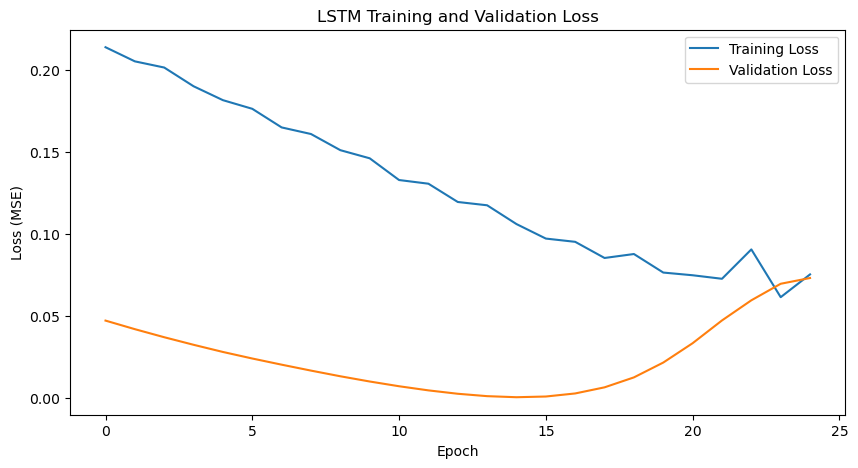


Predicted Total Company Profit for 3/2025: $1,292,591.91


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')

# Convert 'Date of Travel' to datetime and extract year/month
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month

# Aggregate data by year and month to create a time series of total profits
monthly_data = data.groupby(['Travel_Year', 'Travel_Month'])['Profit'].sum().reset_index()

# Create a date column for sorting
monthly_data['Date'] = pd.to_datetime(monthly_data['Travel_Year'].astype(str) + '-' + monthly_data['Travel_Month'].astype(str) + '-01')
monthly_data = monthly_data.sort_values('Date')

# Use only the 'Profit' column for time series forecasting
profits = monthly_data['Profit'].values.reshape(-1, 1)

# Step 2: Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_profits = scaler.fit_transform(profits)

# Step 3: Create sequences for LSTM (e.g., use past 12 months to predict the next month)
def create_sequences(data, lookback=12):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback])
        y.append(data[i + lookback])
    return np.array(X), np.array(y)

lookback = 12  # Use 12 months of past data to predict the next month
X, y = create_sequences(scaled_profits, lookback)

# Step 4: Split into train, validation, and test sets
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.1)
test_size = len(X) - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}, Test samples: {len(X_test)}")

# Step 5: Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(lookback, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Step 6: Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("\nTraining LSTM Model...")
history = model.fit(
    X_train, y_train,
    epochs=50,  # Limited epochs for speed
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Step 7: Evaluate on test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)
rmse = np.sqrt(mse)

# Calculate tolerance-based accuracy
tolerance = 50000  # Adjusted tolerance for monthly totals (since we're predicting monthly profits)
absolute_errors = np.abs(y_pred - y_test_actual)
accuracy_within_tolerance = np.mean(absolute_errors <= tolerance) * 100

print("\nLSTM Performance on Test Data:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (per month): ${rmse:.2f}")
print(f"Accuracy (within ±${tolerance} tolerance): {accuracy_within_tolerance:.2f}%")

# Step 8: Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Step 9: Predict future profits (e.g., March 2025)
def predict_future(model, last_sequence, n_future, scaler, inflation_rate=0.02):
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_future):
        current_sequence_reshaped = current_sequence.reshape((1, lookback, 1))
        next_pred_scaled = model.predict(current_sequence_reshaped, verbose=0)
        next_pred = scaler.inverse_transform(next_pred_scaled)[0, 0]
        future_predictions.append(next_pred)
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred_scaled

    # Apply inflation adjustment
    years_diff = (2025 - 2018) + (3 - 1) / 12  # From end of 2018 to March 2025
    future_predictions = [pred * (1 + inflation_rate) ** years_diff for pred in future_predictions]

    return future_predictions

# Get the last sequence from the data
last_sequence = scaled_profits[-lookback:]

# Predict for March 2025 (1 month ahead from the last data point)
n_future = 1  # Predict 1 month (March 2025)
future_pred = predict_future(model, last_sequence, n_future, scaler)

print(f"\nPredicted Total Company Profit for 3/2025: ${future_pred[0]:,.2f}")

# Note: LSTM predicts total monthly profit, not per-company breakdown, since we aggregated the data


Training LSTM Model for Company Pink Cab...
Epoch 1/50


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1539 - val_loss: 0.0377
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1579 - val_loss: 0.0371
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1559 - val_loss: 0.0366
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1411 - val_loss: 0.0363
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1426 - val_loss: 0.0360
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1315 - val_loss: 0.0359
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1364 - val_loss: 0.0359
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1263 - val_loss: 0.0360
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1213 - val_loss: 0.0362
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1289 - val_loss: 0.0366
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1214 - val_loss: 0.0370
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1172 - val_loss: 0.0376
Epoch 13/50
1/

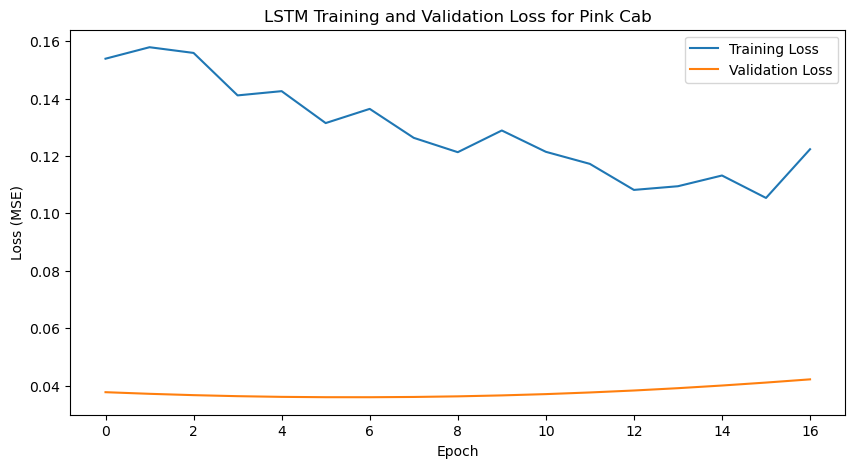


Training LSTM Model for Company Yellow Cab...
Epoch 1/50


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2396 - val_loss: 0.0678
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2217 - val_loss: 0.0657
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2262 - val_loss: 0.0637
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.2097 - val_loss: 0.0618
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.2130 - val_loss: 0.0599
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2191 - val_loss: 0.0581
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.2140 - val_loss: 0.0563
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.2066 - val_loss: 0.0546
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.2137 - val_loss: 0.0530
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.2009 - val_loss: 0.0515
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1790 - val_loss: 0.0500
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.1797 - val_loss: 0.0487
Epoch 13/50
1

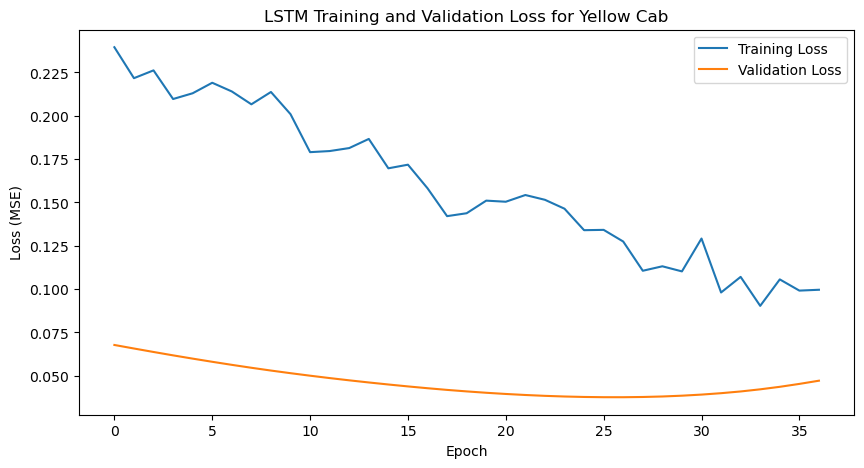


Predicted Profit for Pink Cab in 3/2025: $135,242.31

Predicted Profit for Yellow Cab in 3/2025: $1,226,333.78

Total Predicted Company Profit for 3/2025: $1,361,576.09


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler ,LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')

# Convert 'Date of Travel' to datetime and extract year/month
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month

# Encode 'Company' for per-company predictions
label_encoders = {}
le_company = label_encoders['Company'] = LabelEncoder()
data['Company'] = le_company.fit_transform(data['Company'])

# Aggregate data by year, month, and company to create time series
monthly_data = data.groupby(['Travel_Year', 'Travel_Month', 'Company'])['Profit'].sum().reset_index()

# Create a date column for sorting
monthly_data['Date'] = pd.to_datetime(monthly_data['Travel_Year'].astype(str) + '-' + monthly_data['Travel_Month'].astype(str) + '-01')
monthly_data = monthly_data.sort_values(['Company', 'Date'])

# Step 2: Prepare time series for each company
companies = monthly_data['Company'].unique()
company_profits = {}
for company in companies:
    company_data = monthly_data[monthly_data['Company'] == company]['Profit'].values.reshape(-1, 1)
    company_profits[company] = company_data

# Step 3: Scale the data and create sequences
lookback = 6  # Reduced lookback to create more sequences
scaler = MinMaxScaler(feature_range=(0, 1))
company_sequences = {}

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback])
        y.append(data[i + lookback])
    return np.array(X), np.array(y)

for company, profits in company_profits.items():
    scaled_profits = scaler.fit_transform(profits)
    X, y = create_sequences(scaled_profits, lookback)
    company_sequences[company] = (X, y)

# Step 4: Split into train, validation, and test sets for each company
company_splits = {}
for company, (X, y) in company_sequences.items():
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.2)  # Increased validation size
    test_size = len(X) - train_size - val_size

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

    company_splits[company] = (X_train, y_train, X_val, y_val, X_test, y_test)

# Step 5: Build and train an LSTM model for each company
company_models = {}
for company in companies:
    print(f"\nTraining LSTM Model for Company {le_company.inverse_transform([company])[0]}...")
    X_train, y_train, X_val, y_val, X_test, y_test = company_splits[company]

    # Build a simpler LSTM model
    model = Sequential([
        LSTM(30, activation='relu', input_shape=(lookback, 1), kernel_regularizer=l2(0.01)),
        Dropout(0.3),  # Increased dropout
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    company_models[company] = (model, history)

    # Evaluate on test set
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_actual = scaler.inverse_transform(y_test)

    mse = mean_squared_error(y_test_actual, y_pred)
    r2 = r2_score(y_test_actual, y_pred)
    rmse = np.sqrt(mse)

    tolerance = 200000  # Increased tolerance for monthly totals
    absolute_errors = np.abs(y_pred - y_test_actual)
    accuracy_within_tolerance = np.mean(absolute_errors <= tolerance) * 100

    print(f"\nLSTM Performance for Company {le_company.inverse_transform([company])[0]} on Test Data:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Root Mean Squared Error (per month): ${rmse:.2f}")
    print(f"Accuracy (within ±${tolerance} tolerance): {accuracy_within_tolerance:.2f}%")

    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'LSTM Training and Validation Loss for {le_company.inverse_transform([company])[0]}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.show()

# Step 6: Predict future profits for March 2025
def predict_future(model, last_sequence, n_future, scaler, inflation_rate=0.02):
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_future):
        current_sequence_reshaped = current_sequence.reshape((1, lookback, 1))
        next_pred_scaled = model.predict(current_sequence_reshaped, verbose=0)
        next_pred = scaler.inverse_transform(next_pred_scaled)[0, 0]
        future_predictions.append(next_pred)
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred_scaled

    # Apply inflation adjustment
    years_diff = (2025 - 2018) + (3 - 1) / 12  # From end of 2018 to March 2025
    future_predictions = [pred * (1 + inflation_rate) ** years_diff for pred in future_predictions]

    return future_predictions

# Predict for each company
total_future_profit = 0
for company in companies:
    model, _ = company_models[company]
    scaled_profits = scaler.fit_transform(company_profits[company])
    last_sequence = scaled_profits[-lookback:]
    future_pred = predict_future(model, last_sequence, n_future=1, scaler=scaler)
    company_profit = future_pred[0]
    total_future_profit += company_profit
    print(f"\nPredicted Profit for {le_company.inverse_transform([company])[0]} in 3/2025: ${company_profit:,.2f}")

print(f"\nTotal Predicted Company Profit for 3/2025: ${total_future_profit:,.2f}")

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import xgboost as xgb
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
data = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Taxi_Dataset/merged_data.csv')

# Convert 'Date of Travel' to datetime and extract year/month
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month

# Drop 'Date of Travel' as it's not needed for XGBoost
data = data.drop(columns=['Date of Travel'])

# Check if 'Month' exists and drop it (redundant with Travel_Month)
if 'Month' in data.columns:
    print("Warning: 'Month' column found and will be dropped as it’s redundant with 'Travel_Month'.")
    data = data.drop(columns=['Month'])

# Encode 'Company' for per-company predictions
label_encoders = {}
le_company = label_encoders['Company'] = LabelEncoder()
data['Company'] = le_company.fit_transform(data['Company'])

# Aggregate data by year, month, and company to create time series for LSTM
monthly_data = data.groupby(['Travel_Year', 'Travel_Month', 'Company'])['Profit'].sum().reset_index()
monthly_data['Date'] = pd.to_datetime(monthly_data['Travel_Year'].astype(str) + '-' + monthly_data['Travel_Month'].astype(str) + '-01')
monthly_data = monthly_data.sort_values(['Company', 'Date'])

# Step 2: Prepare time series for each company (LSTM)
companies = monthly_data['Company'].unique()
company_profits = {}
for company in companies:
    company_data = monthly_data[monthly_data['Company'] == company]['Profit'].values.reshape(-1, 1)
    company_profits[company] = company_data

# Step 3: Scale the data and create sequences for LSTM
lookback = 6
scaler = MinMaxScaler(feature_range=(0, 1))
company_sequences = {}

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback])
        y.append(data[i + lookback])
    return np.array(X), np.array(y)

for company, profits in company_profits.items():
    scaled_profits = scaler.fit_transform(profits)
    X, y = create_sequences(scaled_profits, lookback)
    company_sequences[company] = (X, y)

# Step 4: Split into train, validation, and test sets for LSTM
company_splits = {}
for company, (X, y) in company_sequences.items():
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.2)
    test_size = len(X) - train_size - val_size

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
    X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

    company_splits[company] = (X_train, y_train, X_val, y_val, X_test, y_test)

# Step 5: Train LSTM model for each company to predict baseline profits
company_models = {}
lstm_predictions = {}
for company in companies:
    print(f"\nTraining LSTM Model for Company {le_company.inverse_transform([company])[0]}...")
    X_train, y_train, X_val, y_val, X_test, y_test = company_splits[company]

    model = Sequential([
        LSTM(30, activation='relu', input_shape=(lookback, 1), kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    company_models[company] = (model, history)

    # Predict on the entire dataset (train + val + test) to compute residuals
    scaled_profits = scaler.fit_transform(company_profits[company])
    X_all, y_all = create_sequences(scaled_profits, lookback)
    if len(X_all) == 0:
        continue  # Skip if not enough data points for LSTM sequence
    y_pred_scaled = model.predict(X_all)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    lstm_predictions[company] = y_pred.flatten()

# Ensure residuals align with data availability
residuals_data = []
for company in companies:
    company_monthly = monthly_data[monthly_data['Company'] == company].copy()
    if len(company_monthly) <= lookback:
        continue  # Skip if not enough historical data
    company_monthly = company_monthly.iloc[lookback:]
    company_monthly['LSTM_Predicted_Profit'] = lstm_predictions.get(company, np.zeros(len(company_monthly)))
    company_monthly['Residual'] = company_monthly['Profit'] - company_monthly['LSTM_Predicted_Profit']
    residuals_data.append(company_monthly)

residuals_df = pd.concat(residuals_data)

# Step 7: Prepare the original dataset for XGBoost to predict residuals
data['Date'] = pd.to_datetime(data['Travel_Year'].astype(str) + '-' + data['Travel_Month'].astype(str) + '-01')
data = data.merge(residuals_df[['Travel_Year', 'Travel_Month', 'Company', 'Residual']],
                  on=['Travel_Year', 'Travel_Month', 'Company'], how='inner')

# Encode categorical columns
categorical_cols = ['City', 'Payment_Mode', 'Gender']
for col in categorical_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Feature engineering
data['City_Distance'] = data['City'] * data['Distance Travelled(KM)']
data['Company_Month'] = data['Company'] * data['Travel_Month']

# Prepare features (X) and target (y) for XGBoost
exclude_cols = ['Profit', 'Price Charged', 'Cost of Trip', 'Income (USD/Month)', 'Age', 'Year', 'Payment_Mode', 'Gender', 'Date', 'Residual']
X = data.drop(columns=exclude_cols)
y = data['Residual']

# Verify data types
print("\nData types of features for XGBoost:")
print(X.dtypes)
for col in X.columns:
    if not np.issubdtype(X[col].dtype, np.number):  # Allow all numeric types (int32, int64, float64, etc.)
        raise ValueError(f"Column {col} has unsupported dtype {X[col].dtype} for XGBoost.")

# Split data for XGBoost
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

# Step 8: Train XGBoost to predict residuals
print("\nTraining XGBoost Model to Predict Residuals...")
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [0.1, 1.0],
    'reg_alpha': [0, 0.1]
}

rand_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_train, y_train)
best_params = rand_search.best_params_

final_params = {
    'objective': 'reg:squarederror',
    'n_jobs': -1,
    'random_state': 42,
    **best_params
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

final_xgb = xgb.train(
    final_params,
    dtrain,
    num_boost_round=best_params['n_estimators'],
    evals=[(dval, 'validation')],
    early_stopping_rounds=20,
    verbose_eval=10
)

# Step 9: Evaluate the hybrid model
y_pred_residuals = final_xgb.predict(dtest)

# Map test data back to monthly profits to add LSTM predictions
test_data = data.iloc[X_test.index].copy()
test_data['Residual_Predicted'] = y_pred_residuals

# Aggregate test data to monthly level
test_monthly = test_data.groupby(['Travel_Year', 'Travel_Month', 'Company']).agg({
    'Profit': 'sum',
    'Residual_Predicted': 'sum'
}).reset_index()

# Add LSTM predictions for the test period
for company in companies:
    company_test = test_monthly[test_monthly['Company'] == company]
    company_monthly = monthly_data[monthly_data['Company'] == company]
    indices = company_monthly.index[company_monthly[['Travel_Year', 'Travel_Month']].apply(
        lambda x: (x['Travel_Year'], x['Travel_Month']) in
        set(company_test[['Travel_Year', 'Travel_Month']].apply(tuple, axis=1)), axis=1
    )]
    indices = indices - lookback  # Adjust for lookback
    indices = indices[indices >= 0]
    scaled_profits = scaler.fit_transform(company_profits[company])
    X_all, _ = create_sequences(scaled_profits, lookback)
    model, _ = company_models[company]
    y_pred_scaled = model.predict(X_all[indices])
    y_pred = scaler.inverse_transform(y_pred_scaled)
    test_monthly.loc[test_monthly['Company'] == company, 'LSTM_Predicted_Profit'] = y_pred.flatten()

# Final prediction: LSTM + XGBoost residuals
test_monthly['Final_Predicted_Profit'] = test_monthly['LSTM_Predicted_Profit'] + test_monthly['Residual_Predicted']

# Evaluate
mse = mean_squared_error(test_monthly['Profit'], test_monthly['Final_Predicted_Profit'])
r2 = r2_score(test_monthly['Profit'], test_monthly['Final_Predicted_Profit'])
rmse = np.sqrt(mse)

tolerance = 200000
absolute_errors = np.abs(test_monthly['Profit'] - test_monthly['Final_Predicted_Profit'])
accuracy_within_tolerance = np.mean(absolute_errors <= tolerance) * 100

print("\nHybrid LSTM + XGBoost Performance on Test Data (Monthly):")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Root Mean Squared Error (per month): ${rmse:.2f}")
print(f"Accuracy (within ±${tolerance} tolerance): {accuracy_within_tolerance:.2f}%")

# Step 10: Predict future profits for March 2025
def predict_future(model, last_sequence, n_future, scaler, inflation_rate=0.02):
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_future):
        current_sequence_reshaped = current_sequence.reshape((1, lookback, 1))
        next_pred_scaled = model.predict(current_sequence_reshaped, verbose=0)
        next_pred = scaler.inverse_transform(next_pred_scaled)[0, 0]
        future_predictions.append(next_pred)
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred_scaled

    years_diff = (2025 - 2018) + (3 - 1) / 12
    future_predictions = [pred * (1 + inflation_rate) ** years_diff for pred in future_predictions]
    return future_predictions

# Generate future data for XGBoost
def generate_future_data(base_data, year, month, num_trips):
    historical_month_data = base_data[base_data['Travel_Month'] == month].copy()
    if historical_month_data.empty:
        historical_month_data = base_data.copy()

    future_data = historical_month_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02) ** years_diff
    future_data['Cost of Trip'] *= (1 + 0.02) ** years_diff
    future_data['City_Distance'] = future_data['City'] * future_data['Distance Travelled(KM)']
    future_data['Company_Month'] = future_data['Company'] * future_data['Travel_Month']
    future_X = future_data.drop(columns=exclude_cols, errors='ignore')  # Use errors='ignore' to handle missing columns
    return future_X, future_data

avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)
future_X, future_data = generate_future_data(data, 2025, 3, avg_trips_per_month)
future_dmatrix = xgb.DMatrix(future_X)
future_pred_residuals = final_xgb.predict(future_dmatrix)

# Aggregate future residuals by company
future_data['Residual_Predicted'] = future_pred_residuals
future_residuals = future_data.groupby('Company')['Residual_Predicted'].sum()

# Predict LSTM baseline for March 2025
total_future_profit = 0
for company in companies:
    model, _ = company_models[company]
    scaled_profits = scaler.fit_transform(company_profits[company])
    last_sequence = scaled_profits[-lookback:]
    lstm_pred = predict_future(model, last_sequence, n_future=1, scaler=scaler)[0]
    residual_pred = future_residuals[company]
    company_profit = lstm_pred + residual_pred
    total_future_profit += company_profit
    print(f"\nPredicted Profit for {le_company.inverse_transform([company])[0]} in 3/2025: ${company_profit:,.2f}")

print(f"\nTotal Predicted Company Profit for 3/2025: ${total_future_profit:,.2f}")


Training LSTM Model for Company Pink Cab...
Epoch 1/50


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2115 - val_loss: 0.0379
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.2071 - val_loss: 0.0366
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2075 - val_loss: 0.0355
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.2014 - val_loss: 0.0344
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1893 - val_loss: 0.0334
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1857 - val_loss: 0.0325
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1849 - val_loss: 0.0316
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1766 - val_loss: 0.0308
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1768 - val_loss: 0.0301
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1741 - val_loss: 0.0294
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1617 - val_loss: 0.0287
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1677 - val_loss: 0.0282
Epoch 13/50
1/

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2923 - val_loss: 0.0830
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.2878 - val_loss: 0.0801
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.2835 - val_loss: 0.0774
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2605 - val_loss: 0.0749
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2593 - val_loss: 0.0726
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.2716 - val_loss: 0.0704
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.2438 - val_loss: 0.0683
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2394 - val_loss: 0.0663
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.2339 - val_loss: 0.0644
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.2408 - val_loss: 0.0625
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2374 - val_loss: 0.0608
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.2269 - val_loss: 0.0591
Epoch 13/50
1/

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\callback.py:386: UserWarning: [16:44:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[30]	validation-rmse:13846.41769
[40]	validation-rmse:6867.59931
[50]	validation-rmse:3296.05249
[60]	validation-rmse:1863.97783
[70]	validation-rmse:1067.35751
[80]	validation-rmse:635.93508
[90]	validation-rmse:440.19882
[100]	validation-rmse:300.19173
[110]	validation-rmse:169.60809
[120]	validation-rmse:102.83051
[130]	validation-rmse:63.58218
[140]	validation-rmse:39.58646
[150]	validation-rmse:25.60249
[160]	validation-rmse:15.81756
[170]	validation-rmse:10.43240
[180]	validation-rmse:7.11060
[190]	validation-rmse:3.93761
[200]	validation-rmse:2.40944
[210]	validation-rmse:1.59773
[220]	validation-rmse:0.92963
[230]	validation-rmse:0.63585
[240]	validation-rmse:0.51974
[250]	validation-rmse:0.38761
[260]	validation-rmse:0.29102
[270]	validation-rmse:0.20663
[280]	validation-rmse:0.19216
[290]	validation-rmse:0.16979
[300]	validation-rmse:0.16186
[310]	validation-rmse:0.15731
[320]	validation-rmse:0.15649
[330]	validation-rmse:0.15604
[340]	validation-rmse:0.15590
[350]	validation

IndexError: index 30 is out of bounds for axis 0 with size 30